# Preprocessing

In [1]:
import os
import pandas as pd

# Location of datasets created by '[VT]Extract_CDR3b_from_Seurat.rmd'
DATA_FROM_SEURAT_DIR = r'G:\My Drive\Projects\Public\gastric_cancer\VIKTORY\cdr3b_from_seurat_CD8_Exh&CD8_CXCL13'

# Location of Cellranger datasets(filtered_contig_annotation.csv)
# Beware that the name-format of each csv files should be same with the files under the DATA_FROM_SEURAT_DIR
CELLRANGER_DATA_DIR = r'G:\My Drive\Projects\Public\gastric_cancer\VIKTORY\TCR_data'

# Location of output files which will be generated.
OUTPUT_DIR = r'G:\My Drive\Projects\Public\gastric_cancer\VIKTORY\TCRDivER\outputs_TCRDiVER_CD8_Exh&CD8_CXCL13'
# Create the output directory if it doesn't exist
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [2]:
# Read all csv files and store them in a list with their original names
seurat_data = []
files = [f for f in os.listdir(DATA_FROM_SEURAT_DIR) if f.endswith('.csv')]
for file in files:
    file_path = os.path.join(DATA_FROM_SEURAT_DIR, file)
    try:
        df = pd.read_csv(file_path)
        # Add the file information to the dataframe
        df.name = file.replace('.csv', '')  # Store the filename without .csv extension as an attribute
        seurat_data.append(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")

cellranger_data = []
files = [f for f in os.listdir(CELLRANGER_DATA_DIR) if f.endswith('.csv')]
for file in files:
    file_path = os.path.join(CELLRANGER_DATA_DIR, file)
    try:
        df = pd.read_csv(file_path)
        # Add the file information to the dataframe
        df.name = file.replace('.csv', '')  # Store the filename without .csv extension as an attribute
        cellranger_data.append(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")

## Data comparison: Cellranger VS Seurat

In [17]:
# Show the indices of 'seurat_data' to verify the data
print(f"Total files read: {len(seurat_data)}")
# Show the indices of 'cellranger_data' to verify the data
print(f"Total files read from full data: {len(cellranger_data)}")


Total files read: 60
Total files read from full data: 60


In [18]:
# Check if there are any differences in names (setdiff() dose the same in the R)
set([df.name for df in cellranger_data]) - set([df.name for df in seurat_data])  

set()

In [19]:
# Show some names of the dataframes
print("Names of the dataframes:")
for df in seurat_data[:5]:
    print(df.name)

Names of the dataframes:
A09B
A09F1
A10B
A10F1
A10F2


In [20]:
# Count the number of rows in each dataframe in seurat_data
row_counts = [len(df) for df in seurat_data]

# Print the count for each dataframe
for i, count in enumerate(row_counts):
    if hasattr(seurat_data[i], 'name'):
        print(f"{seurat_data[i].name}: {count} rows")
    else:
        print(f"DataFrame {i}: {count} rows")

# Calculate and print the total sum of rows
total_rows = sum(row_counts)
print(f"\nTotal number of rows across all dataframes: {total_rows}")

A09B: 1313 rows
A09F1: 943 rows
A10B: 319 rows
A10F1: 342 rows
A10F2: 84 rows
A11B: 318 rows
A11F1: 299 rows
A11F2: 162 rows
A12B: 385 rows
A12F1: 253 rows
A12F2: 473 rows
A14B: 388 rows
A14F1: 360 rows
A16B: 367 rows
A17B: 326 rows
A17F1: 214 rows
A18B: 320 rows
A18F1: 356 rows
A18F2: 1218 rows
A19B: 374 rows
A19F1: 58 rows
A19F2: 104 rows
A20B: 226 rows
A20F2: 195 rows
A21B: 539 rows
A21F1: 239 rows
A21F2: 256 rows
A22B: 166 rows
A22F1: 63 rows
A22F2: 81 rows
A23B: 135 rows
A23F1: 65 rows
A23F2: 288 rows
A24B: 102 rows
A24F1: 74 rows
A24F2: 118 rows
A25B: 281 rows
A26B: 43 rows
A26F1: 93 rows
A26F2: 107 rows
A27B: 161 rows
A27F1: 84 rows
A27F2: 47 rows
A28B: 68 rows
A28F2: 291 rows
A29B: 35 rows
A29F1: 15 rows
A29F2: 59 rows
A30B: 93 rows
A30F1: 223 rows
A30F2: 102 rows
A32B: 106 rows
A32F1: 110 rows
A32F2: 116 rows
A33B: 298 rows
A33F1: 710 rows
A33F2: 396 rows
A34B: 28 rows
A34F1: 35 rows
A34F2: 194 rows

Total number of rows across all dataframes: 15218


In [21]:
# Set option to display all columns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Increase display width

for df in seurat_data:
    if df.name == 'A09B':
        print(df.head())
        break  # Stop after finding the first match

# Reset display options to default
pd.reset_option('display.max_columns')
pd.reset_option('display.width')

              cdr3  productive_frequency frame_type      TRBV     TRBJ  umis_like  barcode
0    CSARSQGVETQYF              0.000037         In  TRBV20-1  TRBJ2-5          4        1
1    CASSLGWGYEQYF              0.001021         In   TRBV5-4  TRBJ2-7        110        2
2     CASRAGFNEQFF              0.000065         In   TRBV7-2  TRBJ2-1          7        3
3  CAAGASVQGSNEQFF              0.001393         In     TRBV2  TRBJ2-1        150        4
4  CAAGASVQGSNEQFF              0.001393         In     TRBV2  TRBJ2-1        150        5


In [22]:
# Filter all dataframes to keep only 'TRB' chain rows
for i, df in enumerate(cellranger_data):
    # Check if the dataframe has 'chain' column
    if 'chain' in df.columns:
        # Filter dataframe but preserve the name attribute
        filtered_df = df[df['chain'] == 'TRB']
        filtered_df.name = df.name  # Transfer the name attribute
        cellranger_data[i] = filtered_df
    else:
        print(f"Warning: Dataframe {df.name} does not have a 'chain' column.")

# Print the one dataframe shape after filtering
print(f"Shape of first dataframe after filtering: {cellranger_data[1].shape}")

Shape of first dataframe after filtering: (723, 31)


In [23]:
# Count the number of rows in each dataframe in cellranger_data
row_counts = [len(df) for df in cellranger_data]

# Print the count for each dataframe
for i, count in enumerate(row_counts):
    if hasattr(cellranger_data[i], 'name'):
        print(f"{cellranger_data[i].name}: {count} rows")
    else:
        print(f"DataFrame {i}: {count} rows")

# Calculate and print the total sum of rows
total_rows = sum(row_counts)
print(f"\nTotal number of rows across all dataframes: {total_rows}")

A10F1: 1948 rows
A29F2: 723 rows
A30B: 689 rows
A30F1: 1097 rows
A30F2: 509 rows
A32B: 1845 rows
A32F1: 803 rows
A32F2: 987 rows
A33B: 1201 rows
A33F1: 2541 rows
A17F1: 1537 rows
A19F2: 1240 rows
A12F2: 1786 rows
A16B: 1611 rows
A20B: 1809 rows
A10B: 1150 rows
A18B: 1758 rows
A11B: 2471 rows
A19F1: 1389 rows
A09F1: 4700 rows
A19B: 2947 rows
A33F2: 2491 rows
A21B: 1478 rows
A14B: 2536 rows
A12F1: 3274 rows
A22B: 1165 rows
A21F2: 1215 rows
A22F1: 850 rows
A23F1: 599 rows
A23B: 710 rows
A22F2: 572 rows
A12B: 3932 rows
A21F1: 1205 rows
A23F2: 1351 rows
A14F1: 2266 rows
A26B: 317 rows
A24B: 861 rows
A24F1: 559 rows
A27B: 582 rows
A28B: 738 rows
A17B: 2665 rows
A26F1: 556 rows
A24F2: 1755 rows
A25B: 1360 rows
A27F1: 676 rows
A29F1: 202 rows
A09B: 5217 rows
A29B: 825 rows
A27F2: 488 rows
A28F2: 2016 rows
A26F2: 787 rows
A18F1: 1941 rows
A18F2: 5196 rows
A20F2: 1367 rows
A10F2: 655 rows
A11F1: 1051 rows
A11F2: 883 rows
A34B: 600 rows
A34F2: 1591 rows
A34F1: 455 rows

Total number of rows acros

In [24]:
# Create a dictionary to store frequency information
frequency_info = {}

# Get the names of dataframes in seurat_data for quick lookup
seurat_names = [df.name for df in seurat_data]

# Loop through each dataframe in cellranger_data
for cellranger_df in cellranger_data:
    cellranger_name = cellranger_df.name
    
    # Check if a dataframe with the same name exists in seurat_data
    if cellranger_name in seurat_names:
        # Find the corresponding dataframe in seurat_data
        seurat_df = next(df for df in seurat_data if df.name == cellranger_name)
        
        # Count frequency of each CDR3 sequence in both datasets
        cellranger_counts = cellranger_df['cdr3'].value_counts()
        seurat_counts = seurat_df['cdr3'].value_counts()
        
        # Total number of sequences in each dataset
        total_cellranger = len(cellranger_df)
        total_seurat = len(seurat_df)
        
        # Store information in the dictionary
        frequency_info[cellranger_name] = {
            'cellranger_total': total_cellranger,
            'seurat_total': total_seurat,
            'cellranger_unique': len(cellranger_counts),
            'seurat_unique': len(seurat_counts),
            'ratio': total_seurat / total_cellranger
        }
    else:
        # If no match is found, store just the cellranger information
        total_cellranger = len(cellranger_df)
        frequency_info[cellranger_name] = {
            'cellranger_total': total_cellranger,
            'seurat_total': 0,
            'cellranger_unique': len(cellranger_df['cdr3'].unique()),
            'seurat_unique': 0,
            'ratio': 0
        }

# Sort the dataframe names by ratio in descending order
sorted_names = sorted(frequency_info.keys(), key=lambda x: frequency_info[x]['ratio'], reverse=False)

# Print the sorted names and their frequency information
for name in sorted_names:
    info = frequency_info[name]
    print(f"{name}: Cellranger={info['cellranger_total']} sequences ({info['cellranger_unique']} unique), "
          f"Seurat={info['seurat_total']} sequences ({info['seurat_unique']} unique), "
          f"Ratio={info['ratio']:.2f}")

A19F1: Cellranger=1389 sequences (648 unique), Seurat=58 sequences (39 unique), Ratio=0.04
A29B: Cellranger=825 sequences (305 unique), Seurat=35 sequences (20 unique), Ratio=0.04
A34B: Cellranger=600 sequences (520 unique), Seurat=28 sequences (27 unique), Ratio=0.05
A32B: Cellranger=1845 sequences (744 unique), Seurat=106 sequences (55 unique), Ratio=0.06
A24F2: Cellranger=1755 sequences (1341 unique), Seurat=118 sequences (96 unique), Ratio=0.07
A22F1: Cellranger=850 sequences (260 unique), Seurat=63 sequences (28 unique), Ratio=0.07
A29F1: Cellranger=202 sequences (107 unique), Seurat=15 sequences (12 unique), Ratio=0.07
A34F1: Cellranger=455 sequences (353 unique), Seurat=35 sequences (32 unique), Ratio=0.08
A12F1: Cellranger=3274 sequences (2429 unique), Seurat=253 sequences (109 unique), Ratio=0.08
A29F2: Cellranger=723 sequences (340 unique), Seurat=59 sequences (31 unique), Ratio=0.08
A19F2: Cellranger=1240 sequences (762 unique), Seurat=104 sequences (59 unique), Ratio=0.08
A

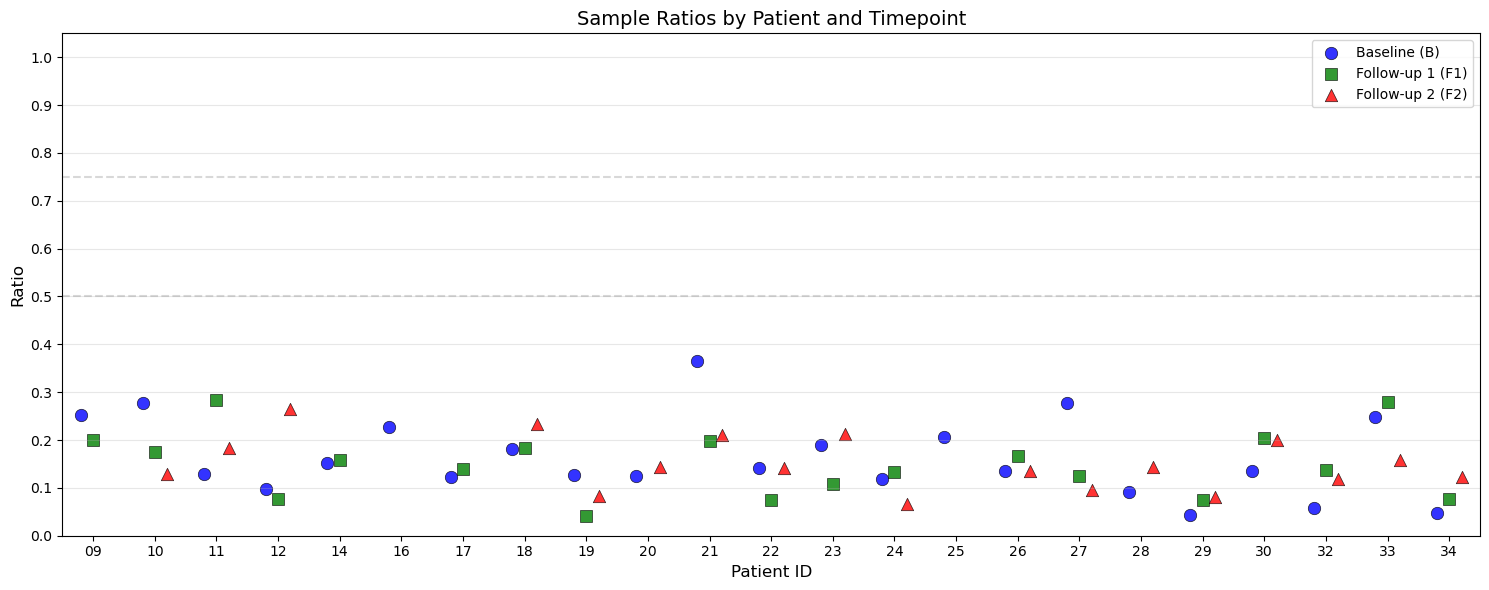

In [25]:
import numpy as np
import re

import matplotlib.pyplot as plt

# Extract patient numbers and timepoints from the dictionary keys
data = {}
for sample_name, info in frequency_info.items():
    # Extract patient number and timepoint using regex
    match = re.match(r'A(\d+)([BF][12]?)', sample_name)
    if match:
        patient_num = match.group(1)
        timepoint = match.group(2)
        
        # Initialize patient entry if not exists
        if patient_num not in data:
            data[patient_num] = {}
        
        # Store ratio for this timepoint
        data[patient_num][timepoint] = info['ratio']

# Sort patient numbers numerically
patient_nums = sorted(data.keys(), key=int)

# Define colors and markers for different timepoints
timepoint_styles = {
    'B': {'color': 'blue', 'marker': 'o', 'label': 'Baseline (B)'},
    'F1': {'color': 'green', 'marker': 's', 'label': 'Follow-up 1 (F1)'},
    'F2': {'color': 'red', 'marker': '^', 'label': 'Follow-up 2 (F2)'}
}
timepoints = ['B', 'F1', 'F2']

# Create plot
plt.figure(figsize=(15, 6))

# Plot dots for each timepoint and patient
for i, timepoint in enumerate(timepoints):
    x_values = []
    y_values = []
    
    for j, patient_num in enumerate(patient_nums):
        if timepoint in data[patient_num]:
            # Add a small offset based on timepoint for better visibility
            offset = (i - 1) * 0.2  # B: -0.2, F1: 0, F2: 0.2
            x_values.append(j + offset)
            y_values.append(data[patient_num][timepoint])
    
    style = timepoint_styles[timepoint]
    plt.scatter(x_values, y_values, 
                color=style['color'], 
                marker=style['marker'], 
                label=style['label'], 
                alpha=0.8, 
                s=80,
                edgecolors='black',
                linewidths=0.5)

# Add reference lines
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.3)
plt.axhline(y=0.75, color='gray', linestyle='--', alpha=0.3)

# Configure plot
plt.ylim(0, 1.05)
plt.xlim(-0.5, len(patient_nums) - 0.5)
plt.xlabel('Patient ID', fontsize=12)
plt.ylabel('Ratio', fontsize=12)
plt.title('Sample Ratios by Patient and Timepoint', fontsize=14)
plt.xticks(range(len(patient_nums)), patient_nums, fontsize=10)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()

# Calculate TCRDiVER

## Load datasets
Load datasets containing B and at least one following timepoint.

In [26]:
# Check one dataframe from the new_data list
for df in seurat_data:
    if df.name == 'A10B':
        print(df.head())
        break  # Stop after finding the first match

               cdr3  productive_frequency frame_type      TRBV     TRBJ  \
0  CATSDGDRAVYNEQFF              0.000345         In  TRBV24-1  TRBJ2-1   
1   CASTPLGQTNQPQHF              0.000345         In    TRBV27  TRBJ1-5   
2     CASSGTGVYEQYF              0.006908         In     TRBV2  TRBJ2-7   
3   CASSLAASPTDTQYF              0.002418         In   TRBV7-7  TRBJ2-3   
4     CASSGTGVYEQYF              0.006908         In     TRBV2  TRBJ2-7   

   umis_like  barcode  
0          1        1  
1          1        2  
2         20        3  
3          7        4  
4         20        5  


In [27]:
# Count the number of rows in each dataframe in seurat_data
row_counts = [len(df) for df in seurat_data]

# Print the count for each dataframe
for i, count in enumerate(row_counts):
    if hasattr(seurat_data[i], 'name'):
        print(f"{seurat_data[i].name}: {count} rows")
    else:
        print(f"DataFrame {i}: {count} rows")

# Calculate and print the total sum of rows
total_rows = sum(row_counts)
print(f"\nTotal number of rows across all dataframes: {total_rows}")

A09B: 1313 rows
A09F1: 943 rows
A10B: 319 rows
A10F1: 342 rows
A10F2: 84 rows
A11B: 318 rows
A11F1: 299 rows
A11F2: 162 rows
A12B: 385 rows
A12F1: 253 rows
A12F2: 473 rows
A14B: 388 rows
A14F1: 360 rows
A16B: 367 rows
A17B: 326 rows
A17F1: 214 rows
A18B: 320 rows
A18F1: 356 rows
A18F2: 1218 rows
A19B: 374 rows
A19F1: 58 rows
A19F2: 104 rows
A20B: 226 rows
A20F2: 195 rows
A21B: 539 rows
A21F1: 239 rows
A21F2: 256 rows
A22B: 166 rows
A22F1: 63 rows
A22F2: 81 rows
A23B: 135 rows
A23F1: 65 rows
A23F2: 288 rows
A24B: 102 rows
A24F1: 74 rows
A24F2: 118 rows
A25B: 281 rows
A26B: 43 rows
A26F1: 93 rows
A26F2: 107 rows
A27B: 161 rows
A27F1: 84 rows
A27F2: 47 rows
A28B: 68 rows
A28F2: 291 rows
A29B: 35 rows
A29F1: 15 rows
A29F2: 59 rows
A30B: 93 rows
A30F1: 223 rows
A30F2: 102 rows
A32B: 106 rows
A32F1: 110 rows
A32F2: 116 rows
A33B: 298 rows
A33F1: 710 rows
A33F2: 396 rows
A34B: 28 rows
A34F1: 35 rows
A34F2: 194 rows

Total number of rows across all dataframes: 15218


In [28]:
from collections import defaultdict

# 1. Create a Grouping dictionary
patient_dict = defaultdict(list)

for df in seurat_data:
    name = df.name  # e.g.: 'A09B'
    patient_id = name[1:-2] if name[-2] == 'F' else name[1:-1]  # '09', '21', etc.
    patient_dict[patient_id].append(df)

# 2. Filter only patient IDs that meet the criteria
filtered_data = []

for patient_id, dfs in patient_dict.items():
    timepoints = [df.name[len(patient_id)+1:] for df in dfs]  # 'B', 'F1', 'F2'
    
    if 'B' in timepoints and (('F1' in timepoints) or ('F2' in timepoints)):
        filtered_data.extend(dfs)  # Include all timepoints for the patient

# 3. Check the results
print(f"{len(filtered_data)} samples meet the criteria.")
print(sorted([df.name for df in filtered_data]))

58 samples meet the criteria.
['A09B', 'A09F1', 'A10B', 'A10F1', 'A10F2', 'A11B', 'A11F1', 'A11F2', 'A12B', 'A12F1', 'A12F2', 'A14B', 'A14F1', 'A17B', 'A17F1', 'A18B', 'A18F1', 'A18F2', 'A19B', 'A19F1', 'A19F2', 'A20B', 'A20F2', 'A21B', 'A21F1', 'A21F2', 'A22B', 'A22F1', 'A22F2', 'A23B', 'A23F1', 'A23F2', 'A24B', 'A24F1', 'A24F2', 'A26B', 'A26F1', 'A26F2', 'A27B', 'A27F1', 'A27F2', 'A28B', 'A28F2', 'A29B', 'A29F1', 'A29F2', 'A30B', 'A30F1', 'A30F2', 'A32B', 'A32F1', 'A32F2', 'A33B', 'A33F1', 'A33F2', 'A34B', 'A34F1', 'A34F2']


In [29]:
filtered_data[0].head()

,cdr3,productive_frequency,frame_type,TRBV,TRBJ,umis_like,barcode
0,CSARSQGVETQYF,0.000037,In,TRBV20-1,TRBJ2-5,4,1
1,CASSLGWGYEQYF,0.001021,In,TRBV5-4,TRBJ2-7,110,2
2,CASRAGFNEQFF,0.000065,In,TRBV7-2,TRBJ2-1,7,3
3,CAAGASVQGSNEQFF,0.001393,In,TRBV2,TRBJ2-1,150,4
4,CAAGASVQGSNEQFF,0.001393,In,TRBV2,TRBJ2-1,150,5


In [30]:
import numpy as np

# A dictionary for TCRDivER inputs
tcrdiver_inputs = {}

# for df in filtered_data: # If you want to leave data at least two timepoints
for df in seurat_data:
    sample_name = df.name
    # 1. Filter frame_type == 'In'
    df_in = df[df["frame_type"] == "In"].copy()
    
    # 2. Rename columns
    df_in = df_in.rename(columns={"cdr3": "amino_acid"})

    # 3. Keep only necessary columns
    df_in = df_in[["amino_acid", "productive_frequency"]].copy()

    # 4. Check normalization: Warn if sum is not 1
    total = df_in["productive_frequency"].sum()
    if not np.isclose(total, 1.0):
        print(f"Warning: Total sum of productive_frequency of {sample_name} = {total:.4f}, not equal to 1.0")

    # 5. Save
    tcrdiver_inputs[sample_name] = df_in
# Check
print(f"TCRDivER inputs will use {len(tcrdiver_inputs)} samples.")

TCRDivER inputs will use 60 samples.


## Calculate Similarity(BLOSUM45)
!CAUTION! Computationally heavy

This part follows the procedure described in the paper:
"Global alignment between two CDRβ3 clone sequences was performed with a gap penalty of 10 and scored using the BLOSUM45 substitution matrix."

In [31]:
from Bio import Align
from Bio.Align import substitution_matrices

# BLOSUM45 score-based distance 계산기
aligner = Align.PairwiseAligner()
aligner.substitution_matrix = substitution_matrices.load("BLOSUM45")
aligner.mode = "global"
aligner.open_gap_score = -10  # "gap penalty of 10" 

def blosum45_distance(s1, s2):
    score12 = aligner.score(s1, s2)
    score11 = aligner.score(s1, s1)
    score22 = aligner.score(s2, s2)
    return 1 - score12 / max(score11, score22)

In [32]:
from tqdm import tqdm  # Package for progress bar

# Dictionary to store distance matrices for each sample
distance_matrices = {}

for sample_name, df in tqdm(tcrdiver_inputs.items()):
    seqs = df["amino_acid"].tolist()
    n = len(seqs)
    dist_mat = np.zeros((n, n))
    
    for i in range(n):
        for j in range(i, n):
            dist = blosum45_distance(seqs[i], seqs[j])
            dist_mat[i, j] = dist
            dist_mat[j, i] = dist  # Symmetric matrix

    distance_matrices[sample_name] = dist_mat

100%|██████████| 60/60 [00:23<00:00,  2.57it/s]


In [33]:
print(f"{len(distance_matrices)} distance matrices created.")
print(distance_matrices['A10B'].shape)
print(distance_matrices['A10B'][:5, :5])

60 distance matrices created.
(319, 319)
[[0.         0.83962264 0.6509434  0.75471698 0.6509434 ]
 [0.83962264 0.         0.7184466  0.67961165 0.7184466 ]
 [0.6509434  0.7184466  0.         0.63043478 0.        ]
 [0.75471698 0.67961165 0.63043478 0.         0.63043478]
 [0.6509434  0.7184466  0.         0.63043478 0.        ]]


In [34]:
BLOSUM45_DIR = os.path.join(DATA_FROM_SEURAT_DIR, 'distance_blosum45')

# Create directory if it doesn't exist
os.makedirs(BLOSUM45_DIR, exist_ok=True)

# Save loop
for sample_name, mat in distance_matrices.items():
    out_path = os.path.join(BLOSUM45_DIR, f"{sample_name}.npz")
    np.savez_compressed(out_path, dist=mat)

print(f"{len(distance_matrices)} distance matrices saved as .npz files.")

60 distance matrices saved as .npz files.


## Calculate Diversity
Calculate D(q, lambda)

In [35]:
import os
import numpy as np

BLOSUM45_DIR = os.path.join(DATA_FROM_SEURAT_DIR, 'distance_blosum45')

# Load distance matrices from .npz files
distance_matrices = {}
for file in os.listdir(BLOSUM45_DIR):
    if file.endswith('.npz') and not file.endswith('_diversity.npz'):
        sample_name = file[:-4]  # Remove .npz extension
        file_path = os.path.join(BLOSUM45_DIR, file)
        data = np.load(file_path)
        distance_matrices[sample_name] = data['dist']

# Check the loaded distance matrices
print(f"Loaded {len(distance_matrices)} distance matrices.")

Loaded 60 distance matrices.


In [36]:
# Check a sample
print(distance_matrices['A10B'].shape)
print(distance_matrices['A10B'][:5, :5])

(319, 319)
[[0.         0.83962264 0.6509434  0.75471698 0.6509434 ]
 [0.83962264 0.         0.7184466  0.67961165 0.7184466 ]
 [0.6509434  0.7184466  0.         0.63043478 0.        ]
 [0.75471698 0.67961165 0.63043478 0.         0.63043478]
 [0.6509434  0.7184466  0.         0.63043478 0.        ]]


In [ ]:
import pandas as pd

# Set q and λ values
q_values = [0, 1, 2, 3, 4, 5, 6, np.inf]
lambda_values = [0, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.75, 1.0, 1.5, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0]

# Dictionary to store diversity profiles
diversity_profiles = {}

for sample_name, df in tcrdiver_inputs.items():
    # Load distance matrix
    dist_path = os.path.join(BLOSUM45_DIR, f"{sample_name}.npz")
    dist_mat = np.load(dist_path)['dist']
    
    freqs = df["productive_frequency"].values
    n = len(freqs) # Number of unique sequences
    
    div_mat = np.zeros((len(q_values), len(lambda_values)))  # q × λ matrix
    
    for i, q in enumerate(q_values):
        for j, lam in enumerate(lambda_values):
            # 1. similarity kernel Z
            Z = np.exp(-lam * dist_mat)

            # dot product of (z_(i1), ..., z_(iS)) * (p_(i1), ..., p_(iS))^T
            Zp = np.dot(Z, freqs)

            # 2. diversity calculation
            if q == 0:
                if lam == 0:  # Shannon diversity when lambda = 0 (Actually not Shannon diversity, but a variant)
                    d_q = -np.sum(freqs * np.log2(freqs + np.finfo(float).eps)) # Avoid log2(0)
                else:
                    d_q = np.sum(freqs / Zp)
            elif q == 1:
                # Shannon Clonality
                if lam == 0:  # Shannon clonality when lambda = 0 (Acutually not Shannon clonality, but a variant)
                    unique_sequences = np.count_nonzero(freqs)  # Count of unique sequences
                    d_q = 1 -np.sum(freqs * np.log2(freqs + np.finfo(float).eps)) / np.log2(unique_sequences + np.finfo(float).eps)
                else:
                    d_q = np.exp(-np.sum(freqs * np.log2(Zp)))
            elif q == np.inf:
                d_q = 1.0 / np.max(Zp)
            else:
                d_q = np.power(np.sum(freqs * (Zp ** (q - 1))), 1 / (1 - q))
            
            div_mat[i, j] = d_q

    # Save diversity profile
    div_df = pd.DataFrame(div_mat, index=q_values, columns=lambda_values)
    diversity_profiles[sample_name] = div_df

In [38]:
# Save diversity profiles to npz files
for sample_name, div_df in diversity_profiles.items():
    out_path = os.path.join(BLOSUM45_DIR, f"{sample_name}_diversity.npz")
    np.savez_compressed(out_path, div=div_df.values, index=div_df.index, columns=div_df.columns)

### Load Diversity

In [39]:
import os
import numpy as np
import pandas as pd

BLOSUM45_DIR = os.path.join(DATA_FROM_SEURAT_DIR, 'distance_blosum45')

# Load diversity profiles from .npz files
diversity_profiles = {}
for file in os.listdir(BLOSUM45_DIR):
    if file.endswith('_diversity.npz'):
        sample_name = file.split('_diversity.npz')[0]  # Remove _diversity.npz extension
        file_path = os.path.join(BLOSUM45_DIR, file)
        data = np.load(file_path, allow_pickle=True)
        # Reconstruct the DataFrame with proper index and columns
        div_df = pd.DataFrame(
            data['div'], 
            index=data['index'], 
            columns=data['columns']
        )
        diversity_profiles[sample_name] = div_df

# Check the loaded diversity profiles
print(f"Loaded {len(diversity_profiles)} diversity profiles.")

Loaded 60 diversity profiles.


In [40]:
# Check one diversity profile
for sample_name, div_df in diversity_profiles.items():
    print(f"Diversity profile for {sample_name}:")
    print(div_df.head())
    break  # Stop after checking the first profile

Diversity profile for A09B:
        0.00      0.10      0.20      0.25      0.30      0.40      0.50   \
0.0  9.842797  1.056938  1.116435  1.147158  1.178536  1.243279  1.310695   
1.0  1.950201  1.083134  1.172069  1.218792  1.267063  1.368369  1.476232   
2.0  1.000000  1.056891  1.116236  1.146836  1.178057  1.242371  1.309183   
3.0  1.000000  1.056868  1.116137  1.146677  1.177821  1.241925  1.308445   
4.0  1.000000  1.056845  1.116039  1.146519  1.177587  1.241486  1.307719   

        0.75      1.00      1.50      2.00      4.00       8.00       16.00  \
0.0  1.491064  1.688399  2.132680  2.637288  5.018653  11.558192  73.330966   
1.0  1.776048  2.121370  2.956307  3.983458  9.268451  16.396330  18.846032   
2.0  1.487082  1.680149  2.107789  2.579048  4.463280   6.060816   6.300442   
3.0  1.485168  1.676252  2.096562  2.554409  4.314368   5.698155   5.891361   
4.0  1.483306  1.672509  2.086108  2.532354  4.205740   5.485261   5.660302   

          32.00       64.00  
0.0 

In [41]:
# Check a specific diversity profile
print(diversity_profiles['A16B'].round(3))

     0.00   0.10   0.20   0.25   0.30   0.40   0.50   0.75   1.00   1.50   \
0.0  7.760  1.069  1.142  1.180  1.220  1.302  1.388  1.626  1.896  2.544   
1.0  1.911  1.101  1.211  1.270  1.332  1.462  1.604  2.012  2.506  3.798   
2.0  1.000  1.069  1.142  1.180  1.219  1.301  1.387  1.621  1.885  2.500   
3.0  1.000  1.069  1.142  1.180  1.219  1.300  1.386  1.619  1.879  2.479   
4.0  1.000  1.069  1.142  1.180  1.219  1.300  1.385  1.617  1.874  2.459   
5.0  1.000  1.069  1.142  1.180  1.219  1.300  1.384  1.615  1.869  2.441   
6.0  1.000  1.069  1.142  1.180  1.218  1.299  1.384  1.612  1.864  2.424   
inf  1.000  1.063  1.128  1.162  1.197  1.267  1.341  1.535  1.741  2.182   

     2.00    4.00    8.00     16.00    32.00    64.00  
0.0  3.355   8.790  40.990  156.932  173.283  173.952  
1.0  5.563  17.969  53.517   78.229   79.521   79.560  
2.0  3.221   6.360   8.797    9.026    9.028    9.028  
3.0  3.161   5.695   7.030    7.116    7.117    7.117  
4.0  3.107   5.291   6.327

### Combine BR info with the Diversity

In [42]:
BR_INFO_DIR = r'G:\My Drive\Projects\Public\gastric_cancer\VIKTORY'
# From BR_INFO_DIR, load the BR_info.xlsx
BR_info = pd.read_excel(os.path.join(BR_INFO_DIR, 'BR_info.xlsx'))
BR_info.head()

,patient_ids,BR,resp_or_not
0,A09,PR,R
1,A10,SD,NR
2,A11,PR,R
3,A12,SD,NR
4,A13,PD,NR


In [43]:
# Remove 'A' from patient IDs in BR_info
BR_info['patient_ids'] = BR_info['patient_ids'].str.replace('A', '', regex=False)
BR_info['patient_ids'].head()

0    09
1    10
2    11
3    12
4    13
Name: patient_ids, dtype: object

In [44]:
# Check samples in the diversity profiles
diversity_profiles.keys()
# lambda values (Equal across all samples)
example_sample = next(iter(diversity_profiles.values()))
lambda_values = example_sample.columns
lambda_values
import matplotlib.pyplot as plt
from collections import defaultdict

# List of all sample names
all_samples = list(diversity_profiles.keys())
all_samples[:5] # Display the first 5 samples
# Group by patient ID
patient_samples = defaultdict(list)

for sample_name in all_samples:
    patient_id = sample_name[1:-2] if sample_name[-2] == 'F' else sample_name[1:-1]
    patient_samples[patient_id].append(sample_name)

patient_samples

defaultdict(list,
            {'09': ['A09B', 'A09F1'],
             '10': ['A10B', 'A10F1', 'A10F2'],
             '11': ['A11B', 'A11F1', 'A11F2'],
             '12': ['A12B', 'A12F1', 'A12F2'],
             '14': ['A14B', 'A14F1'],
             '16': ['A16B'],
             '17': ['A17B', 'A17F1'],
             '18': ['A18B', 'A18F1', 'A18F2'],
             '19': ['A19B', 'A19F1', 'A19F2'],
             '20': ['A20B', 'A20F2'],
             '21': ['A21B', 'A21F1', 'A21F2'],
             '22': ['A22B', 'A22F1', 'A22F2'],
             '23': ['A23B', 'A23F1', 'A23F2'],
             '24': ['A24B', 'A24F1', 'A24F2'],
             '25': ['A25B'],
             '26': ['A26B', 'A26F1', 'A26F2'],
             '27': ['A27B', 'A27F1', 'A27F2'],
             '28': ['A28B', 'A28F2'],
             '29': ['A29B', 'A29F1', 'A29F2'],
             '30': ['A30B', 'A30F1', 'A30F2'],
             '32': ['A32B', 'A32F1', 'A32F2'],
             '33': ['A33B', 'A33F1', 'A33F2'],
             '34': ['A34B', '

In [45]:
# Create a sorting function that orders by response status (R, ATMmut., NR) and then by patient number
def sort_key(patient_key):
    # Split the key to get patient number and response status
    parts = patient_key.split(' - ')
    patient_num = int(parts[0])
    resp_status = parts[1] if len(parts) > 1 else ''
    
    # Assign priority to response status (R: 0, ATMmut.: 1, NR: 2)
    resp_priority = {'R': 0, 'ATMmut.': 1, 'NR': 2}.get(resp_status, 3)
    
    # Return tuple for sorting (response priority, patient number)
    return (resp_priority, patient_num)

# Create a new sorted dictionary
# Create a mapping of patient ID to response status from BR_info
patient_response_map = dict(zip(BR_info['patient_ids'], BR_info['resp_or_not']))

# Create a sorted dictionary based on response groups
sorted_patient_samples = {}

# First create patient keys with response status
patient_keys = []
for patient_num in patient_samples.keys():
    response_status = patient_response_map.get(patient_num, '')
    patient_key = f"{patient_num} - {response_status}"
    patient_keys.append(patient_key)

# Sort the patient keys
sorted_keys = sorted(patient_keys, key=sort_key)

# Create the sorted dictionary
for key in sorted_keys:
    patient_num = key.split(' - ')[0]
    sorted_patient_samples[key] = patient_samples[patient_num]

sorted_patient_samples

{'09 - R': ['A09B', 'A09F1'],
 '11 - R': ['A11B', 'A11F1', 'A11F2'],
 '18 - R': ['A18B', 'A18F1', 'A18F2'],
 '19 - R': ['A19B', 'A19F1', 'A19F2'],
 '21 - R': ['A21B', 'A21F1', 'A21F2'],
 '23 - R': ['A23B', 'A23F1', 'A23F2'],
 '29 - R': ['A29B', 'A29F1', 'A29F2'],
 '30 - R': ['A30B', 'A30F1', 'A30F2'],
 '32 - R': ['A32B', 'A32F1', 'A32F2'],
 '26 - ATMmut.': ['A26B', 'A26F1', 'A26F2'],
 '28 - ATMmut.': ['A28B', 'A28F2'],
 '34 - ATMmut.': ['A34B', 'A34F1', 'A34F2'],
 '10 - NR': ['A10B', 'A10F1', 'A10F2'],
 '12 - NR': ['A12B', 'A12F1', 'A12F2'],
 '14 - NR': ['A14B', 'A14F1'],
 '17 - NR': ['A17B', 'A17F1'],
 '20 - NR': ['A20B', 'A20F2'],
 '22 - NR': ['A22B', 'A22F1', 'A22F2'],
 '24 - NR': ['A24B', 'A24F1', 'A24F2'],
 '27 - NR': ['A27B', 'A27F1', 'A27F2'],
 '33 - NR': ['A33B', 'A33F1', 'A33F2'],
 '16 - ': ['A16B'],
 '25 - ': ['A25B']}

In [46]:
# Update the patient samples to BR-info-added-version
patient_samples = sorted_patient_samples

# Plots

## Diversity by lambda

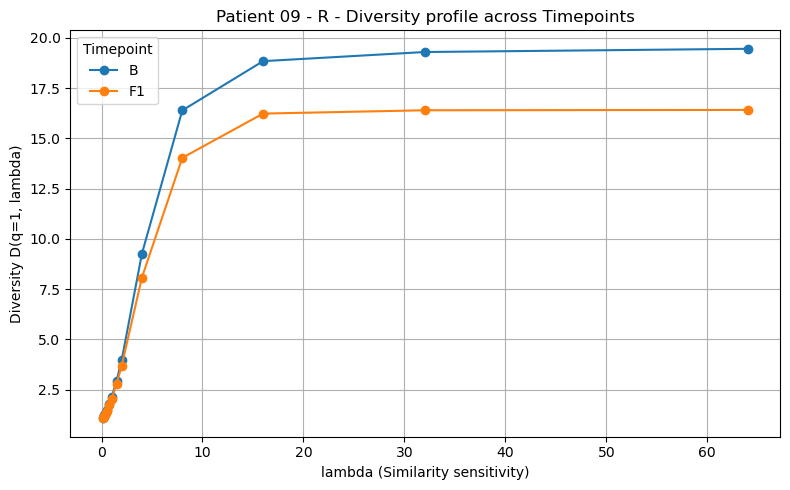

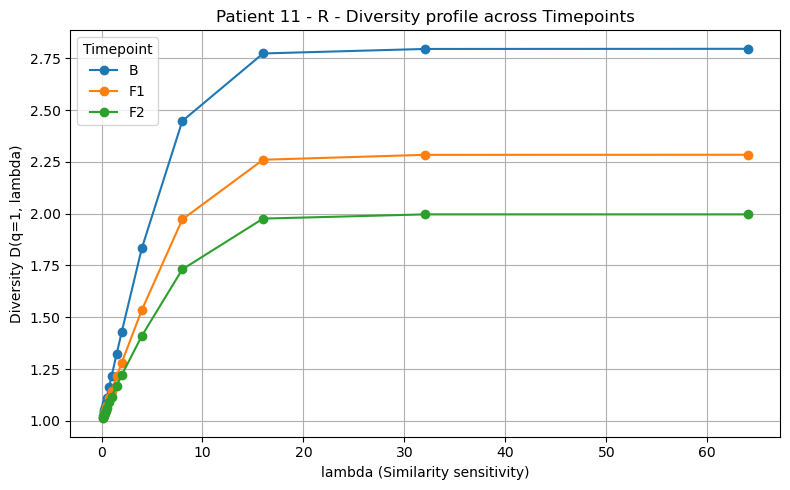

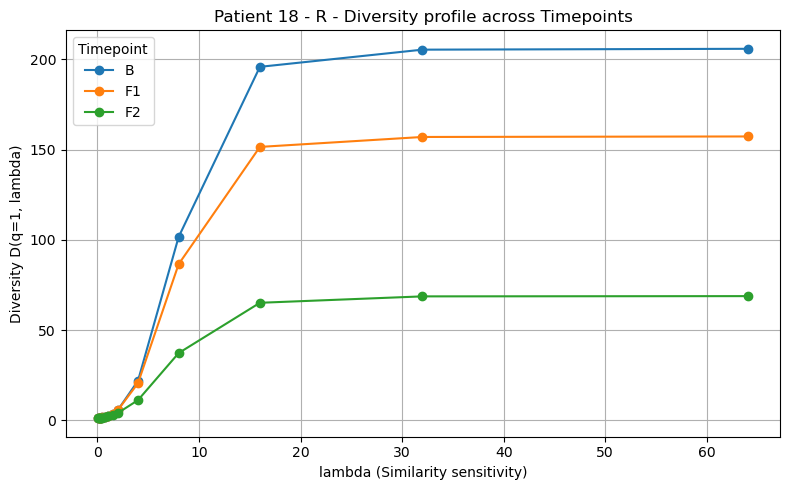

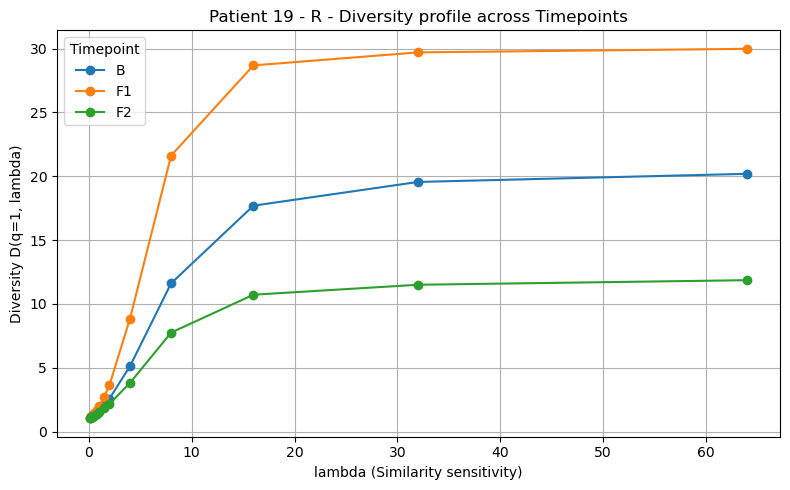

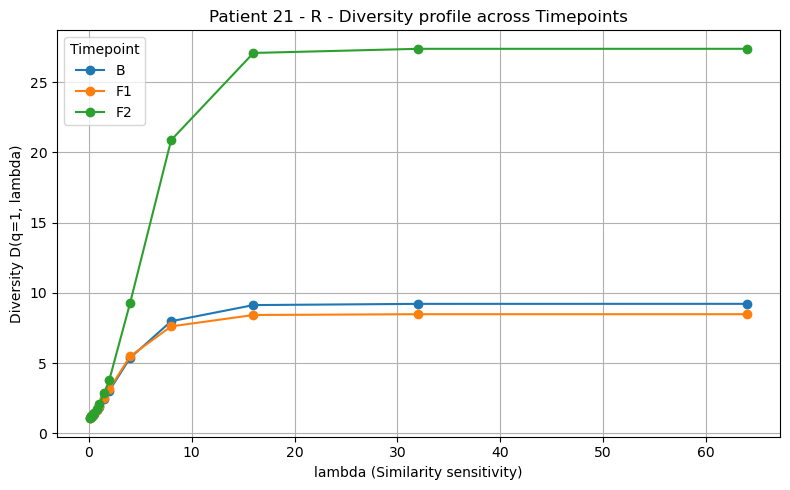

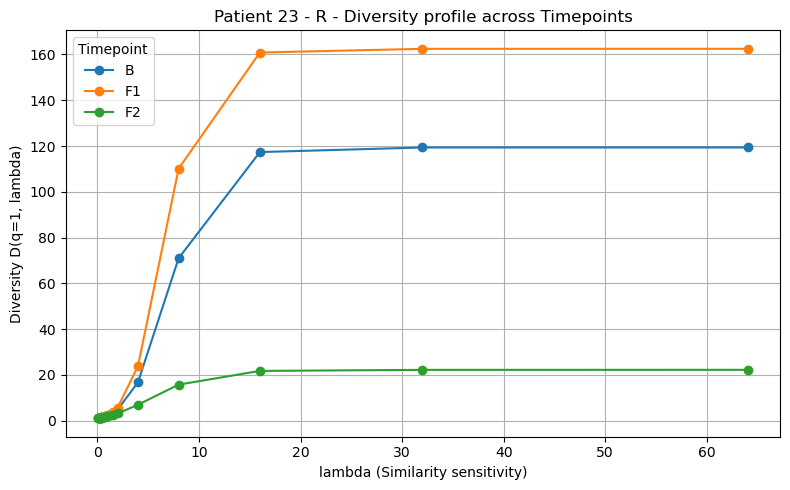

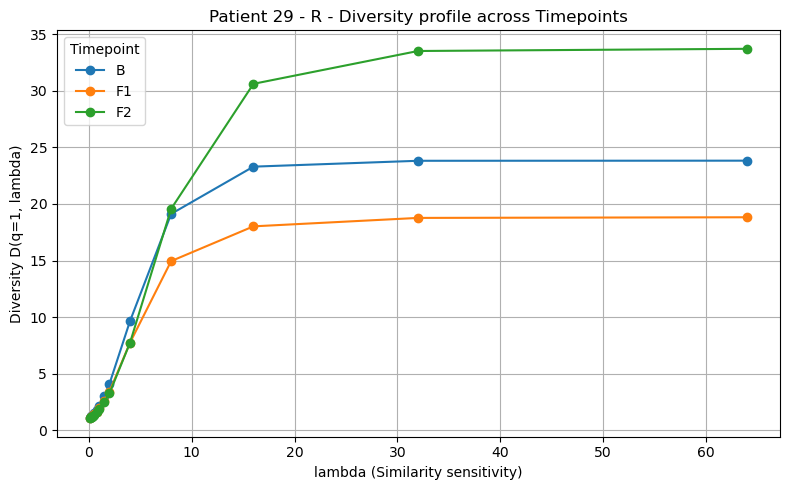

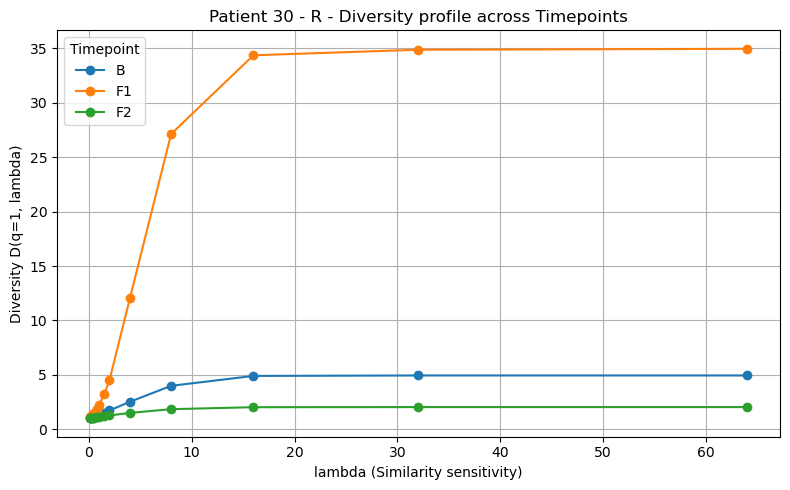

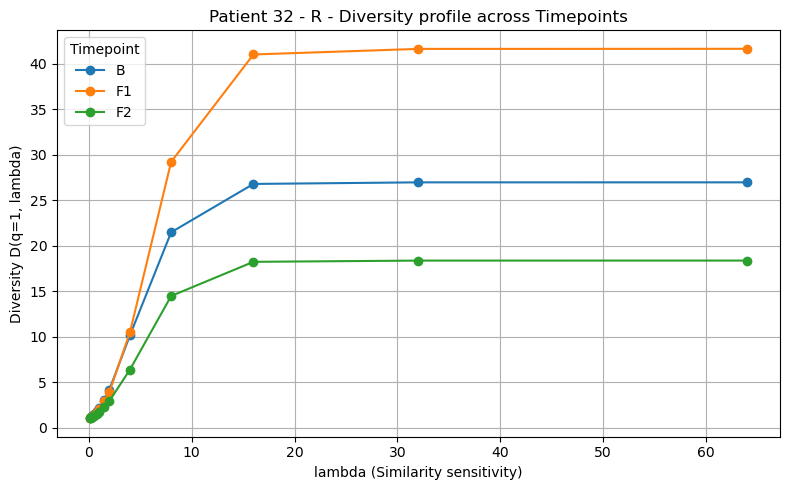

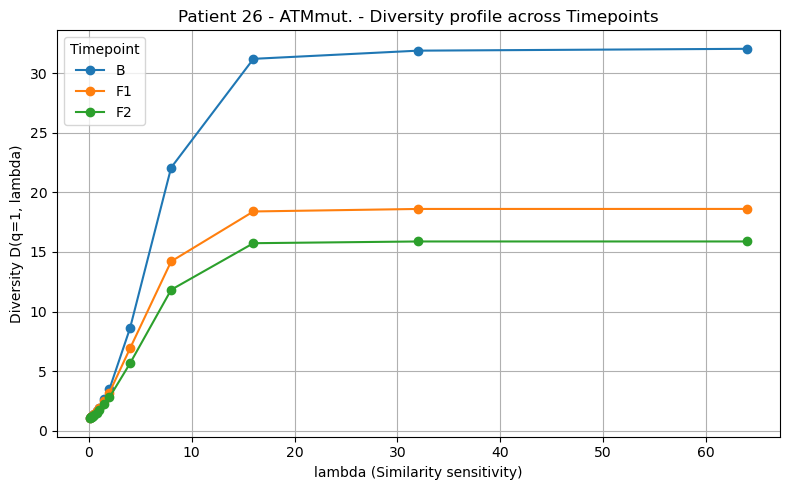

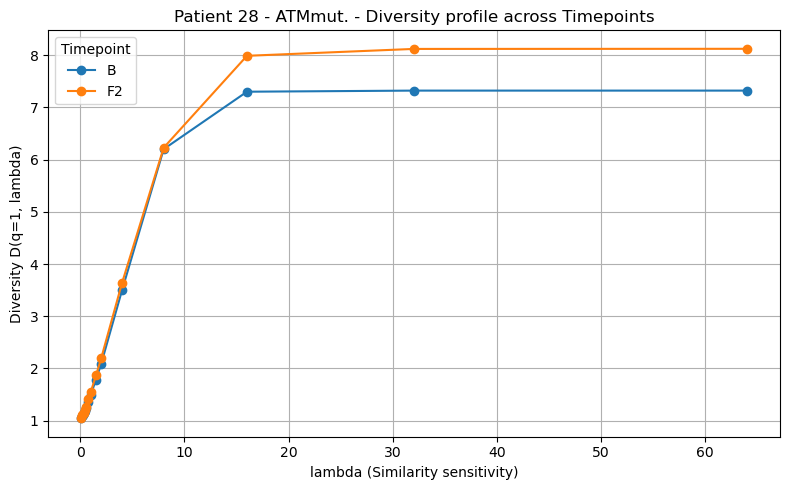

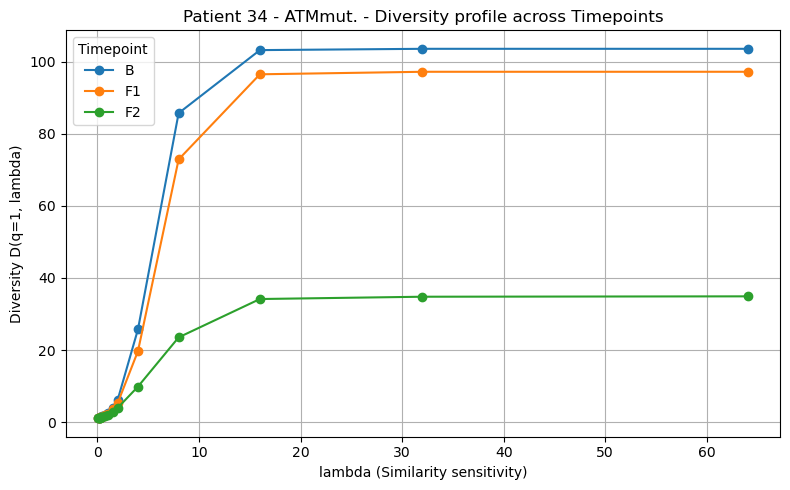

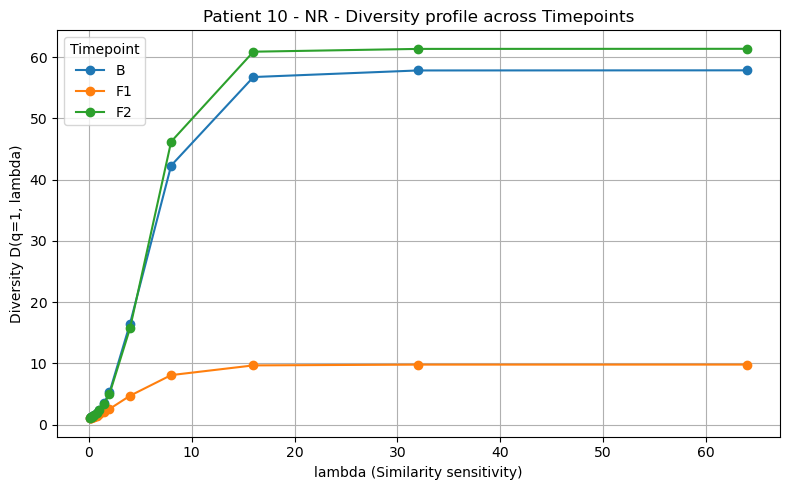

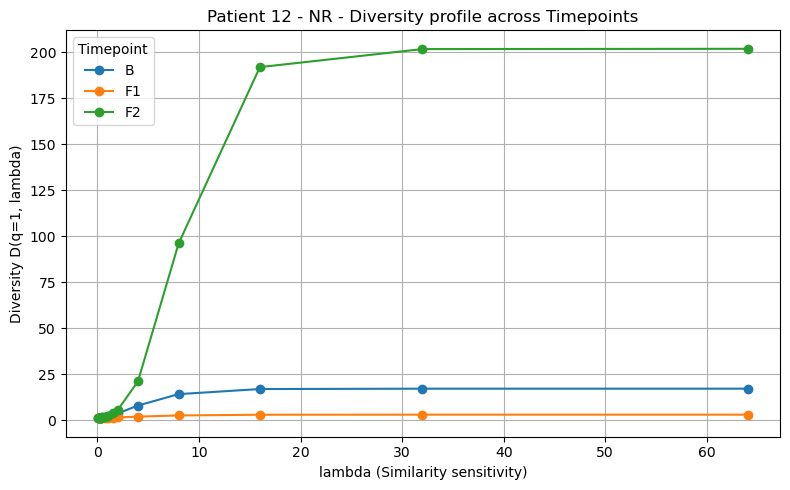

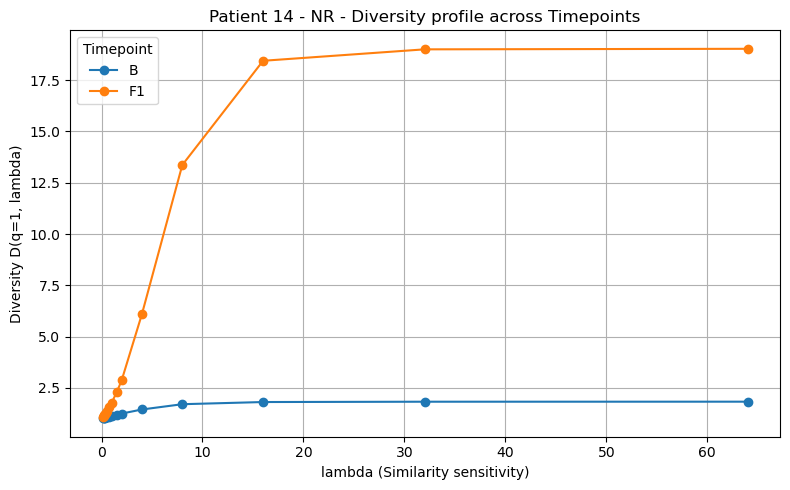

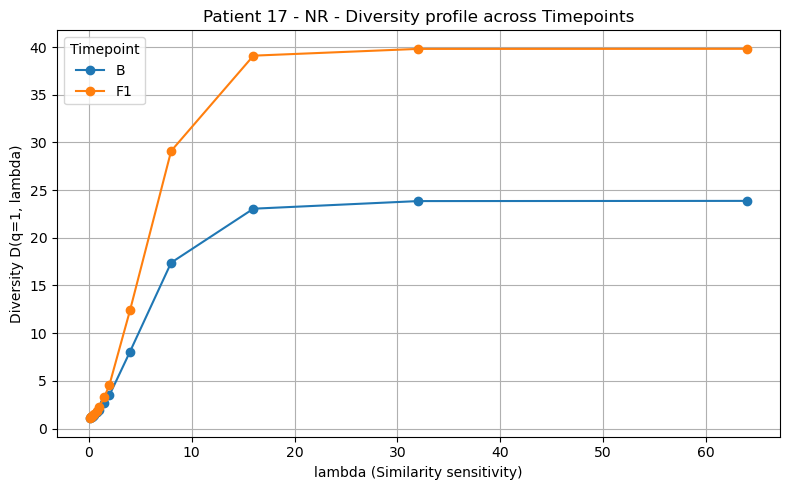

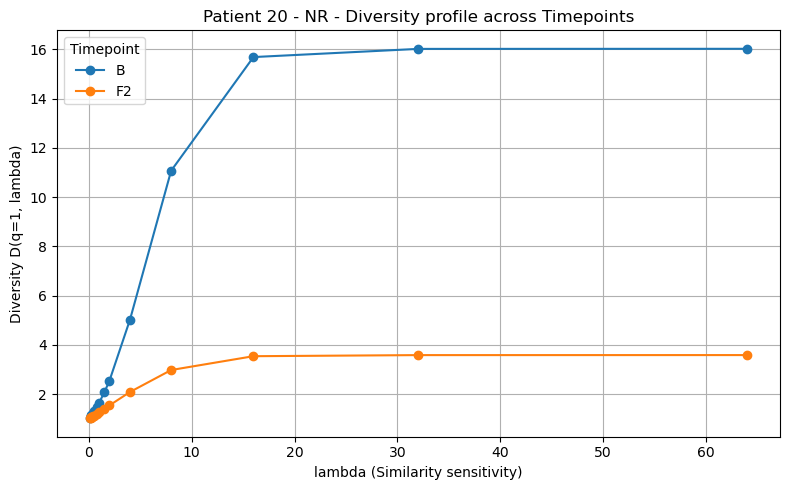

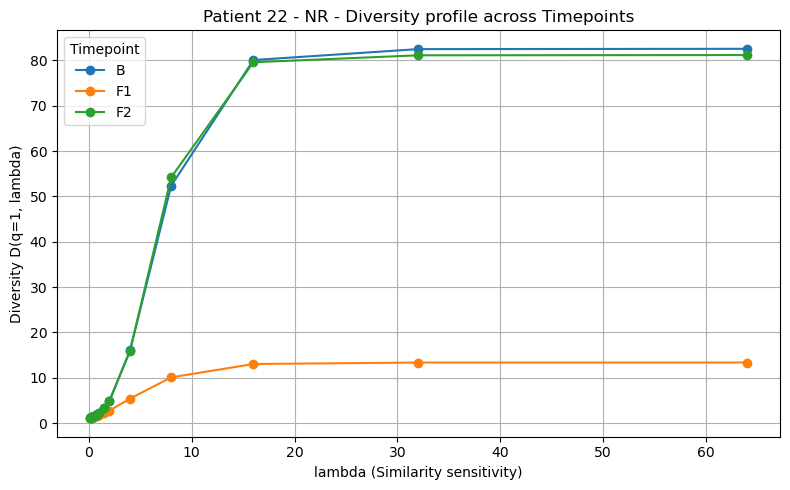

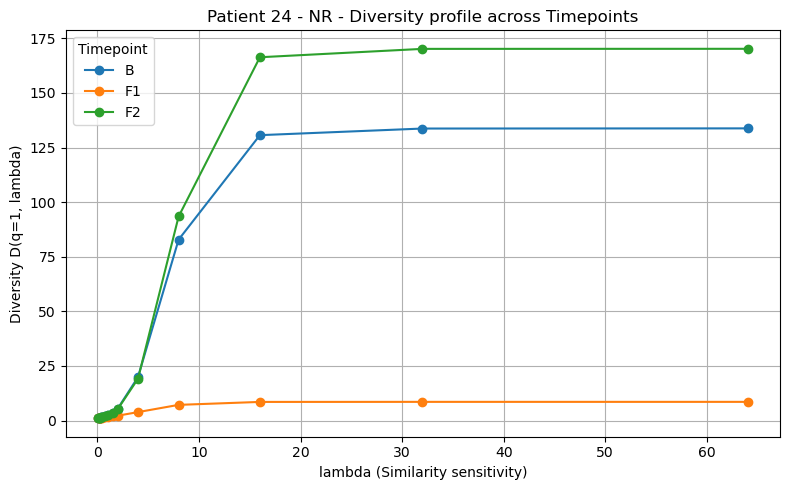

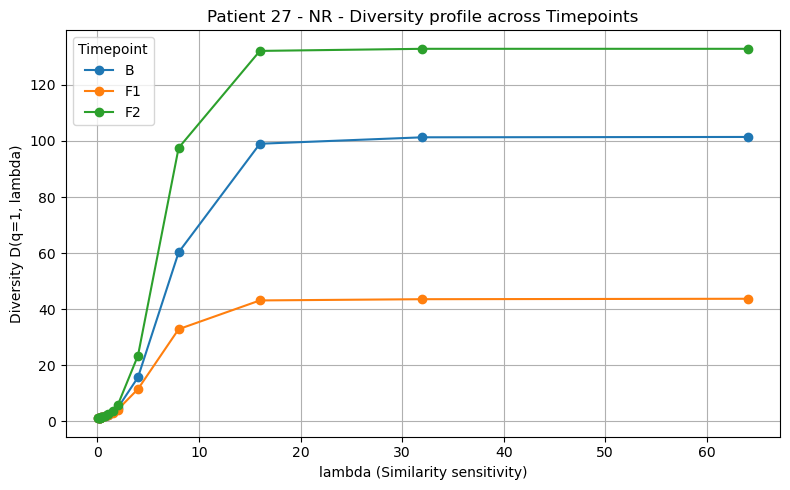

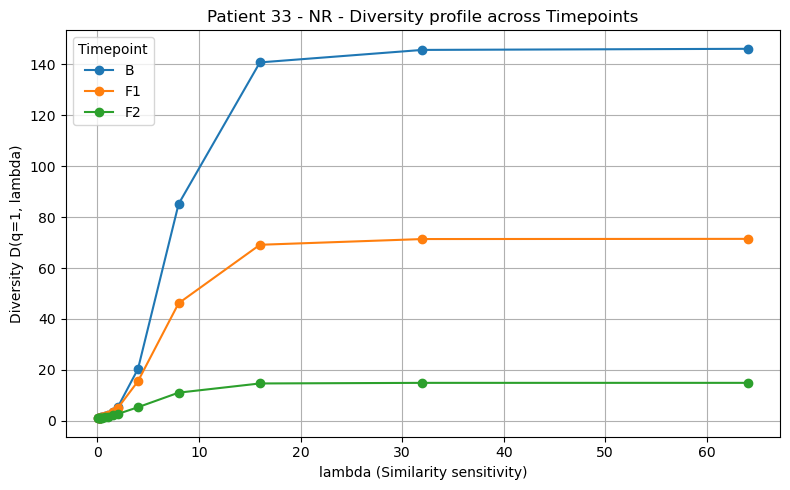

In [47]:
# q and λ values
lambda_values = [0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.75, 1.0, 1.5, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0]
# fix a q for 2-dimensional visualization
q_fixed = 1

# Visualization 
# y-axis: lambda
# x-axis: Similarity-scaled Diversity(lambda, q_fixed)
for patient_id in patient_samples.keys():
    sample_list = patient_samples[patient_id]

    # Only draw for more than 2 timepoints
    if len(sample_list) < 2:
        continue

    # Only draw for samples with 'B' timepoint
    if not any('B' in s for s in sample_list):
        continue

    # Sort timepoints
    time_sorted = []
    patient_num = patient_id.split(' - ')[0]  # Extract patient number without response status
    for label in ['B', 'F1', 'F2']:
        full_name = f"A{patient_num}{label}"
        if full_name in sample_list:
            time_sorted.append(full_name)

    # If timepoints are empty, skip
    if not time_sorted:
        continue

    # plot
    plt.figure(figsize=(8, 5))
    for sample_id in time_sorted:
        # Extract timepoint label (B, F1, F2)
        label = sample_id[-2:] if sample_id[-2] == 'F' else 'B'
        if sample_id in diversity_profiles:
            df = diversity_profiles[sample_id]
            y_vals = df.loc[q_fixed][lambda_values].values
            plt.plot(lambda_values, y_vals, label=label, marker='o')
    
    plt.xlabel("lambda (Similarity sensitivity)")
    plt.ylabel(f"Diversity D(q={q_fixed}, lambda)")
    plt.title(f"Patient {patient_id} - Diversity profile across Timepoints")
    plt.legend(title="Timepoint")
    plt.grid(True)
    plt.xscale('linear')
    plt.tight_layout()
    plt.show()

## 3d Box
Draw 3d box for following 3 indices:
- Shannon Clonality
- Shannon Diversity
- Similarity-Scaled Diversity

All the indices will be normalized in the range [0,1].

In [51]:
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import itertools
import nbformat
# ==============================================================================
# 1. DATA EXTRACTION AND PROCESSING
#    - Extracts the three required diversity metrics for each patient.
#    - Filters for patients with all three timepoints (B, F1, F2).
#    - Performs sum-to-one normalization across timepoints for each metric.
# ==============================================================================

    
# Define the (q, lambda) coordinates for each axis
axis_coords = {
    'TCRDiVER': (1, 32),
    'Shannon Diversity': (0, 0),
    'Shannon Clonality': (1, 0)
}
print("Processing patient data...")
plot_data = []
# Iterate through each patient defined in patient_samples
for patient_id_full, samples in patient_samples.items():
    patient_num = patient_id_full.split(' - ')[0]
    response_status = patient_id_full.split(' - ')[1]
    # --- Check for presence of all three timepoints ---
    has_b = any('B' in s for s in samples)
    has_f1 = any('F1' in s for s in samples)
    has_f2 = any('F2' in s for s in samples)
    if not (has_b and has_f1 and has_f2):
        print(f"Skipping {patient_num}: Missing one or more timepoints.")
        continue
    # --- Extract diversity values for the patient ---
    patient_metrics = {metric: [] for metric in axis_coords.keys()}
    for tp_label in ['B', 'F1', 'F2']:
        sample_name = f"A{patient_num}{tp_label}"
        if sample_name in diversity_profiles:
            for metric_name, coords in axis_coords.items():
                value = diversity_profiles[sample_name].loc[coords]
                patient_metrics[metric_name].append(value)
    # --- Perform re-scale for each metrics ---
    # Normalize each metric by the sum across timepoints
    rescaled_metrics = {}
    for metric_name, values in patient_metrics.items():
        total = sum(values)
        if total > 0:
            rescaled_values = [v / total for v in values]
        rescaled_metrics[metric_name] = rescaled_values

    # --- Append formatted data for plotting ---
    timepoint_map = {'B': 'Baseline', 'F1': 'Follow-up 1', 'F2': 'Follow-up 2'}
    for i, tp_label in enumerate(['B', 'F1', 'F2']):
        timepoint_full = timepoint_map[tp_label]
        plot_data.append({
            'Patient ID': patient_num,
            'Response': response_status,
            'Timepoint': timepoint_full,
            'Group': f'{response_status} - {timepoint_full}',
            'TCRDiVER': rescaled_metrics['TCRDiVER'][i],
            'Shannon Diversity': rescaled_metrics['Shannon Diversity'][i],
            'Shannon Clonality': rescaled_metrics['Shannon Clonality'][i]
        })
# Create the final DataFrame for plotting
df_3d = pd.DataFrame(plot_data)
print("\nData processing complete. DataFrame created:")
print(df_3d.head())
# ==============================================================================
# 2. 3D INTERACTIVE VISUALIZATION
#    - Uses Plotly Express to create the interactive 3D scatter plot.
# ==============================================================================
if not df_3d.empty:
    print("\nGenerating 3D interactive plot...")
    fig = px.scatter_3d(
        df_3d,
        x='TCRDiVER',
        y='Shannon Diversity',
        z='Shannon Clonality',
        color='Group',          # Assigns a unique color to each group
        symbol='Group',         # Assigns a unique marker shape to each group
        hover_name='Patient ID',
        hover_data={          # Additional info to show on hover
            'Group': False,   # Hide the 'Group' from hover as it's in color legend
            'Response': True,
            'Timepoint': True,
            'TCRDiVER': ':.3f', # Format to 3 decimal places
            'Shannon Diversity': ':.3f',
            'Shannon Clonality': ':.3f'
        },
        title="Interactive 3D Analysis of 3 normalized metrics",
        # Explicitly set axis ranges to form a cube
        # range_x=[0, 1],
        # range_y=[0, 1],
        # range_z=[0, 1],
        # Set labels for clarity
        labels={
            "TCRDiVER": "TCRDiVER",
            "Shannon Diversity": "Shannon Diversity",
            "Shannon Clonality": "Shannon Clonality"
        }
    )
    # Improve layout and aesthetics
    fig.update_layout(
        margin=dict(l=0, r=0, b=0, t=40), # Reduce margins
        legend_title_text='Patient Groups'
    )
    fig.update_traces(marker_size=5) # Adjust marker size
    # Display the plot
    fig.show()
else:
    print("\nNo data available to plot. Ensure some patients have all three timepoints.")

Processing patient data...
Skipping 09: Missing one or more timepoints.
Skipping 28: Missing one or more timepoints.
Skipping 14: Missing one or more timepoints.
Skipping 17: Missing one or more timepoints.
Skipping 20: Missing one or more timepoints.
Skipping 16: Missing one or more timepoints.
Skipping 25: Missing one or more timepoints.

Data processing complete. DataFrame created:
  Patient ID Response    Timepoint            Group  TCRDiVER  \
0         11        R     Baseline     R - Baseline  0.395037   
1         11        R  Follow-up 1  R - Follow-up 1  0.322794   
2         11        R  Follow-up 2  R - Follow-up 2  0.282168   
3         18        R     Baseline     R - Baseline  0.476522   
4         18        R  Follow-up 1  R - Follow-up 1  0.364241   

   Shannon Diversity  Shannon Clonality  
0           0.355925           0.337011  
1           0.345665           0.334071  
2           0.298409           0.328918  
3           0.313689           0.336181  
4          

In [49]:
# ==============================================================================
# 3. SAVE THE PLOT AS HTML
#    - Saves the interactive plot as an HTML file for sharing or embedding.
# ==============================================================================
fig.write_html(os.path.join(OUTPUT_DIR, "Shannon&DiVER_3d.html"))

## !!Choose Tuning Parameters!!
**This is required for all plots below.**
- Parameters for index: Choose only one here.

>For 'Shannon'-related indices, the q_fixed and lambda_fixed are just for tweak, so don't mean anything.
- Parameters for height of p-values
>These are for the heights of p-value-texts displayed in the plots in *Box + Vln* part.

In [67]:
# ==============================================================================
# Parameters for index
# ==============================================================================
# ---------------------------TCRDiVER---------------------------
# Set fixed q and lambda values (choose one of the following)
lambda_fixed = 32; q_fixed = 1  # Based on the plot above

# ---------------------------Shannon Diversity---------------------------
# lambda_fixed = 0; q_fixed = 0 # Shannon Diversity

# ---------------------------Shannon Clonality---------------------------
# lambda_fixed = 0; q_fixed = 1 # Shannon Clonality

# ==============================================================================
# Parameters for height of p-values
# ==============================================================================
HEIGHT_P_VAL_B_F1_R = 0.97
HEIGHT_P_VAL_B_F2_R = 1.1
HEIGHT_P_VAL_F1_F2_R = HEIGHT_P_VAL_B_F2_R - 0.07
HEIGHT_P_VAL_B_F1_NR = 1.05
HEIGHT_P_VAL_B_F2_NR = 1.01
HEIGHT_P_VAL_F1_F2_NR = HEIGHT_P_VAL_B_F2_NR - 0.004

HEIGHT_P_VAL_VS_NR = .2

## Rating Heatmap

Show the rating of diversity by timepoints for each patient IDs.

### For all samples

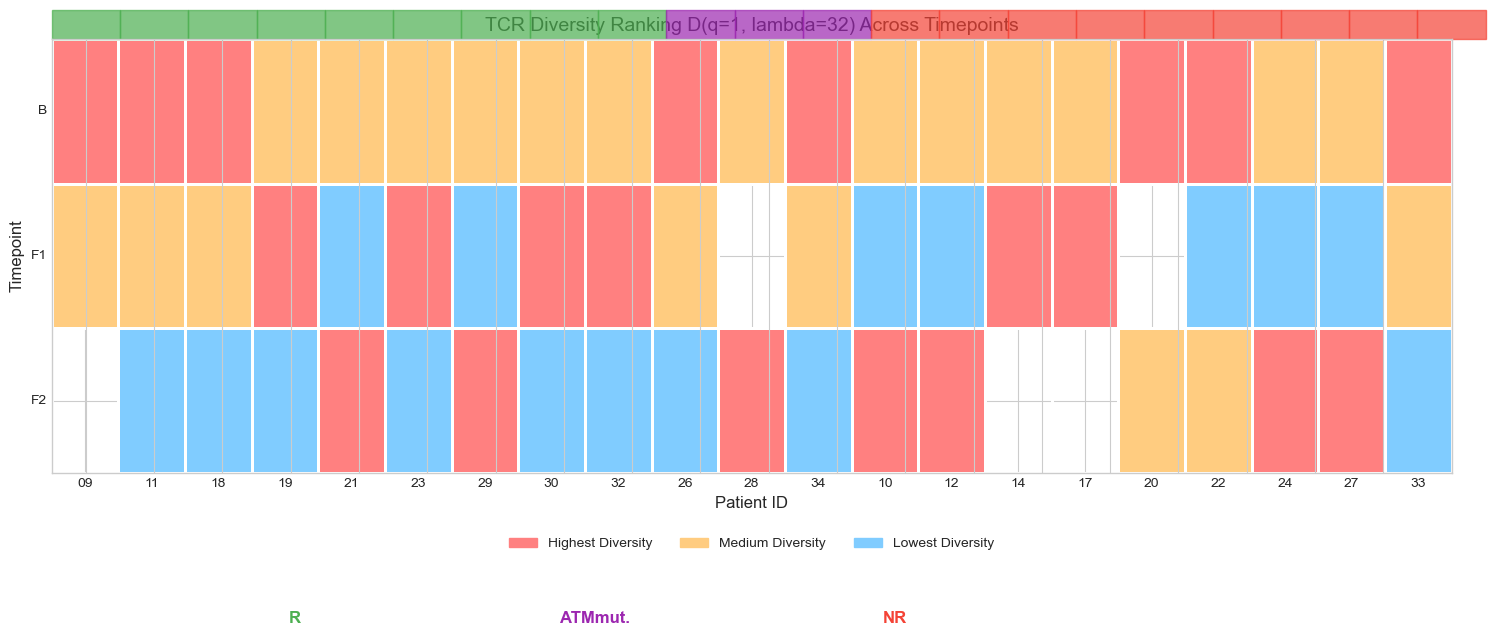

In [82]:
# Prepare data for the heatmap
patients = []
response_groups = []
diversity_data = []

for patient_id in patient_samples.keys():
    sample_list = patient_samples[patient_id]
    
    # Need all three timepoints to include in visualization
    if not any('B' in s for s in sample_list):
        continue
        
    # Get patient number without response status
    patient_num = patient_id.split(' - ')[0]
    response_status = patient_id.split(' - ')[1] if ' - ' in patient_id else ''
    
    # Get diversity values for each timepoint
    timepoints_data = {'B': None, 'F1': None, 'F2': None}
    
    for label in ['B', 'F1', 'F2']:
        sample_name = f"A{patient_num}{label}"
        if sample_name in diversity_profiles:
            timepoints_data[label] = diversity_profiles[sample_name].loc[q_fixed, lambda_fixed]
    
    # If we have at least two timepoints with data, add to our visualization
    if sum(v is not None for v in timepoints_data.values()) >= 2:
        patients.append(patient_num)
        response_groups.append(response_status)
        diversity_data.append([timepoints_data['B'], timepoints_data['F1'], timepoints_data['F2']])

# Convert to numpy array for easier manipulation but convert None to NaN first
diversity_array = np.array([[np.nan if x is None else x for x in patient] for patient in diversity_data], dtype=float)

# Create a mask for missing values
mask = np.isnan(diversity_array)

# For each patient, determine the color based on the order (descending)
normalized_data = np.zeros_like(diversity_array)
for i in range(len(diversity_array)):
    valid_values = diversity_array[i][~np.isnan(diversity_array[i])]
    if len(valid_values) > 0:
        # Sort values in descending order and get ranks
        sorted_indices = np.argsort(-valid_values)
        ranks = np.zeros(len(valid_values))
        ranks[sorted_indices] = np.arange(len(valid_values))
        
        # Map ranks to original positions
        j = 0
        for k in range(len(diversity_array[i])):
            if not np.isnan(diversity_array[i][k]):
                normalized_data[i][k] = ranks[j]
                j += 1

# Transpose the data for 90-degree counter-clockwise rotation
normalized_data = normalized_data.T
mask = mask.T


# Create figure and axes
plt.figure(figsize=(15, 6))

# Define colors for different ranks
colors = ['#ff8080', '#ffcc80', '#80ccff']  # Red (highest), Orange (middle), Blue (lowest)
cmap = ListedColormap(colors)

# Plot heatmap
ax = sns.heatmap(normalized_data, 
                 mask=mask, 
                 cmap=cmap, 
                 cbar=False,
                 linewidths=1,
                 linecolor='white')

# After rotation: X-axis is patients, Y-axis is timepoints
plt.xticks(np.arange(len(patients)) + 0.5, patients)
plt.yticks([0.5, 1.5, 2.5], ['B', 'F1', 'F2'], rotation=0)
if q_fixed == 0 and lambda_fixed == 0:
    plt.title('TCR Diversity Ranking by Shannon Diversity Across Timepoints', fontsize=14)
elif q_fixed == 1 and lambda_fixed == 0:
    plt.title('TCR Diversity Ranking by Shannon Clonality Across Timepoints', fontsize=14)
else:
    plt.title(f'TCR Diversity Ranking D(q={q_fixed}, lambda={lambda_fixed}) Across Timepoints', fontsize=14)
plt.xlabel('Patient ID', fontsize=12)
plt.ylabel('Timepoint', fontsize=12)

# Add color legend
handles = [Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(3)]
labels = ['Highest Diversity', 'Medium Diversity', 'Lowest Diversity']
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=3)

# Add response group indicators 
response_colors = {'R': '#4CAF50', 'NR': '#F44336', 'ATMmut.': '#9C27B0'}
unique_responses = ['R', 'ATMmut.', 'NR']

# Create a new axis for response group indicators
ax_response = ax.twiny()
ax_response.set_xticks(np.arange(len(patients)) + 0.5)
ax_response.set_xticklabels('')
ax_response.tick_params(axis='x', length=0)

# Add colored boxes for response groups
for i, resp in enumerate(response_groups):
    if resp in response_colors:
        ax_response.add_patch(Rectangle((i, -0.2), 1, 0.2, color=response_colors[resp], clip_on=False, alpha=0.7))

# Add response group labels
for i, resp in enumerate(unique_responses):
    plt.figtext(0.2 + i*0.2, -0.05, resp, color=response_colors[resp], ha='center', fontsize=12, weight='bold')

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

### For intact T.P.s

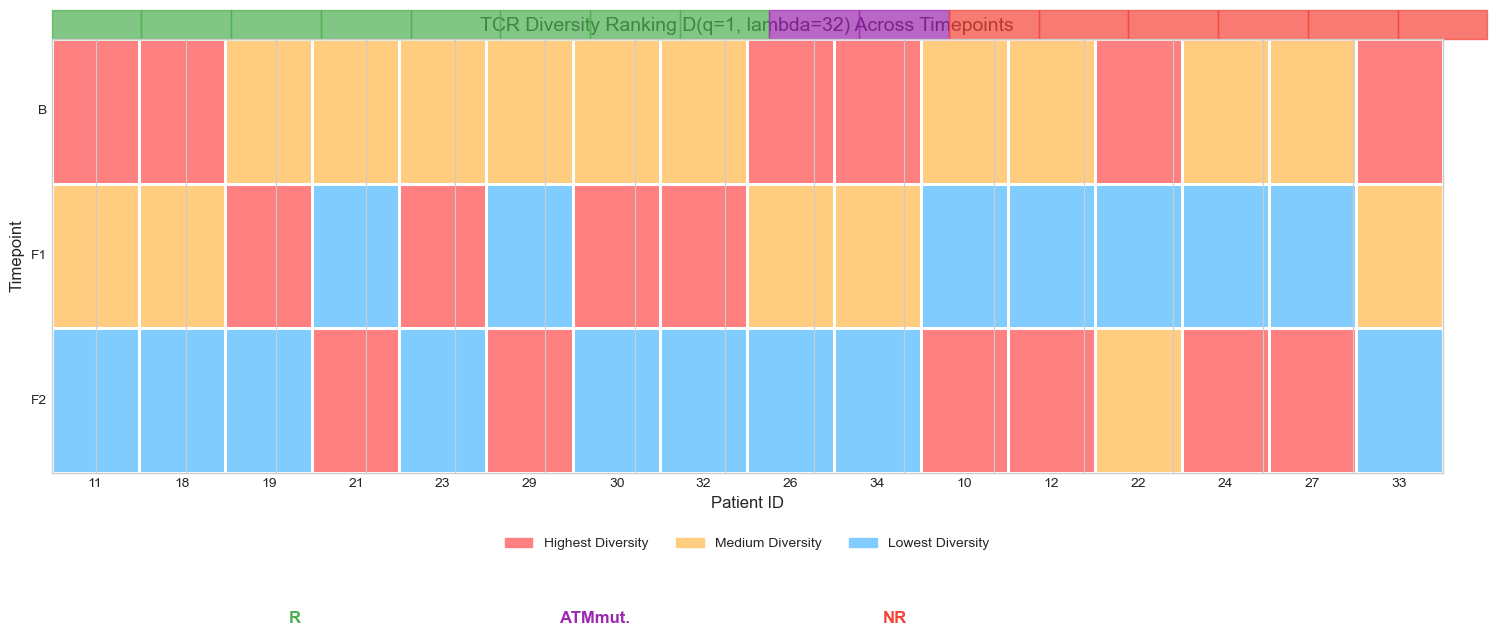

In [83]:
# Prepare data for the heatmap
patients_intact = []
response_groups_intact = []
diversity_data_intact = []

for patient_id in patient_samples.keys():
    sample_list = patient_samples[patient_id]
    
    # Need all three timepoints to include in visualization
    if not any('B' in s for s in sample_list):
        continue
        
    # Get patient number without response status
    patient_num = patient_id.split(' - ')[0]
    response_status = patient_id.split(' - ')[1] if ' - ' in patient_id else ''
    
    # Get diversity values for each timepoint
    timepoints_data = {'B': None, 'F1': None, 'F2': None}
    
    for label in ['B', 'F1', 'F2']:
        sample_name = f"A{patient_num}{label}"
        if sample_name in diversity_profiles:
            timepoints_data[label] = diversity_profiles[sample_name].loc[q_fixed, lambda_fixed]
    
    # If we have at least 3 timepoints with data, add to our visualization
    if sum(v is not None for v in timepoints_data.values()) >= 3:
        patients_intact.append(patient_num)
        response_groups_intact.append(response_status)
        diversity_data_intact.append([timepoints_data['B'], timepoints_data['F1'], timepoints_data['F2']])

# Convert to numpy array for easier manipulation but convert None to NaN first
diversity_array = np.array([[np.nan if x is None else x for x in patient] for patient in diversity_data_intact], dtype=float)

# Create a mask for missing values
mask = np.isnan(diversity_array)

# For each patient, determine the color based on the order (descending)
normalized_data = np.zeros_like(diversity_array)
for i in range(len(diversity_array)):
    valid_values = diversity_array[i][~np.isnan(diversity_array[i])]
    if len(valid_values) > 0:
        # Sort values in descending order and get ranks
        sorted_indices = np.argsort(-valid_values)
        ranks = np.zeros(len(valid_values))
        ranks[sorted_indices] = np.arange(len(valid_values))
        
        # Map ranks to original positions
        j = 0
        for k in range(len(diversity_array[i])):
            if not np.isnan(diversity_array[i][k]):
                normalized_data[i][k] = ranks[j]
                j += 1

# Transpose the data for 90-degree counter-clockwise rotation
normalized_data = normalized_data.T
mask = mask.T
# Create figure and axes
plt.figure(figsize=(15, 6))

# Define colors for different ranks
colors = ['#ff8080', '#ffcc80', '#80ccff']  # Red (highest), Orange (middle), Blue (lowest)
cmap = ListedColormap(colors)

# Plot heatmap
ax = sns.heatmap(normalized_data, 
                 mask=mask, 
                 cmap=cmap, 
                 cbar=False,
                 linewidths=1,
                 linecolor='white')

# After rotation: X-axis is patients_intact, Y-axis is timepoints
plt.xticks(np.arange(len(patients_intact)) + 0.5, patients_intact)
plt.yticks([0.5, 1.5, 2.5], ['B', 'F1', 'F2'], rotation=0)
plt.title(f'TCR Diversity Ranking D(q={q_fixed}, lambda={lambda_fixed}) Across Timepoints', fontsize=14)
plt.xlabel('Patient ID', fontsize=12)
plt.ylabel('Timepoint', fontsize=12)

# Add color legend
handles = [Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(3)]
labels = ['Highest Diversity', 'Medium Diversity', 'Lowest Diversity']
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=3)

# Add response group indicators 
response_colors = {'R': '#4CAF50', 'NR': '#F44336', 'ATMmut.': '#9C27B0'}
unique_responses = ['R', 'ATMmut.', 'NR']

# Create a new axis for response group indicators
ax_response = ax.twiny()
ax_response.set_xticks(np.arange(len(patients_intact)) + 0.5)
ax_response.set_xticklabels('')
ax_response.tick_params(axis='x', length=0)

# Add colored boxes for response groups
for i, resp in enumerate(response_groups_intact):
    if resp in response_colors:
        ax_response.add_patch(Rectangle((i, -0.2), 1, 0.2, color=response_colors[resp], clip_on=False, alpha=0.7))

# Add response group labels
for i, resp in enumerate(unique_responses):
    plt.figtext(0.2 + i*0.2, -0.05, resp, color=response_colors[resp], ha='center', fontsize=12, weight='bold')

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

## Box + Vln

#### Sum-to-one normalization
We can't use samples with any NA in any timepoint, so they will be discarded

In [84]:
# Put patient_samples.keys() to the rownames of the diversity_data
diversity_df = pd.DataFrame(diversity_data, columns=['B', 'F1', 'F2'])
diversity_df['patient'] = patients
diversity_df['response'] = response_groups
# Reorder columns if desired
diversity_df = diversity_df[['patient', 'response', 'B', 'F1', 'F2']]
print(diversity_df)

   patient response           B          F1          F2
0       09        R   19.300423   16.402229         NaN
1       11        R    2.795254    2.284069    1.996603
2       18        R  205.408712  157.009299   68.640606
3       19        R   19.555408   29.702161   11.502959
4       21        R    9.213047    8.476556   27.361518
5       23        R  119.374421  162.471865   22.207559
6       29        R   23.817878   18.770058   33.518395
7       30        R    4.947588   34.879584    2.041261
8       32        R   26.984179   41.645927   18.387680
9       26  ATMmut.   31.873772   18.606559   15.880534
10      28  ATMmut.    7.321139         NaN    8.119382
11      34  ATMmut.  103.566350   97.194482   34.794669
12      10       NR   57.821763    9.811458   61.340212
13      12       NR   17.095753    2.968298  201.649344
14      14       NR    1.820285   19.006150         NaN
15      17       NR   23.846917   39.804982         NaN
16      20       NR   16.014901         NaN    3

In [85]:
# Put patient_samples.keys() to the rownames of the diversity_data
diversity_df_intact = pd.DataFrame(diversity_data_intact, columns=['B', 'F1', 'F2'])
diversity_df_intact['patient'] = patients_intact
diversity_df_intact['response'] = response_groups_intact
# Reorder columns if desired
diversity_df_intact = diversity_df_intact[['patient', 'response', 'B', 'F1', 'F2']]
print(diversity_df_intact)

   patient response           B          F1          F2
0       11        R    2.795254    2.284069    1.996603
1       18        R  205.408712  157.009299   68.640606
2       19        R   19.555408   29.702161   11.502959
3       21        R    9.213047    8.476556   27.361518
4       23        R  119.374421  162.471865   22.207559
5       29        R   23.817878   18.770058   33.518395
6       30        R    4.947588   34.879584    2.041261
7       32        R   26.984179   41.645927   18.387680
8       26  ATMmut.   31.873772   18.606559   15.880534
9       34  ATMmut.  103.566350   97.194482   34.794669
10      10       NR   57.821763    9.811458   61.340212
11      12       NR   17.095753    2.968298  201.649344
12      22       NR   82.497237   13.352665   81.134179
13      24       NR  133.720191    8.556713  170.202162
14      27       NR  101.316833   43.556985  132.887913
15      33       NR  145.559807   71.363172   14.946111


In [86]:
diversity_df_intact_normalized = []
# Calculate normalized diversity for each patient
for patient_data in diversity_df_intact[['B', 'F1', 'F2']].values:
    # Calculate total diversity, ignoring NaN values
    total_diversity = np.nansum(patient_data)
    
    # Calculate diversity: value / total_diversity
    normalized_data = patient_data / total_diversity if total_diversity > 0 else patient_data  # Avoid division by zero
    diversity_df_intact_normalized.append(normalized_data)

# Check if the normalization calculation worked
diversity_df_intact_normalized = pd.DataFrame(
    diversity_df_intact_normalized,
    columns=['B', 'F1', 'F2']
)
# Insert 'patient' and 'response' columns at the front
diversity_df_intact_normalized.insert(0, 'response', diversity_df_intact['response'].values)
diversity_df_intact_normalized.insert(0, 'patient', diversity_df_intact['patient'].values)
print(diversity_df_intact_normalized)

   patient response         B        F1        F2
0       11        R  0.395037  0.322794  0.282168
1       18        R  0.476522  0.364241  0.159237
2       19        R  0.321844  0.488840  0.189316
3       21        R  0.204502  0.188154  0.607344
4       23        R  0.392609  0.534352  0.073038
5       29        R  0.312955  0.246629  0.440415
6       30        R  0.118170  0.833076  0.048754
7       32        R  0.310100  0.478591  0.211309
8       26  ATMmut.  0.480310  0.280385  0.239306
9       34  ATMmut.  0.439669  0.412618  0.147713
10      10       NR  0.448323  0.076073  0.475603
11      12       NR  0.077107  0.013388  0.909505
12      22       NR  0.466128  0.075446  0.458426
13      24       NR  0.427933  0.027383  0.544683
14      27       NR  0.364762  0.156814  0.478424
15      33       NR  0.627767  0.307774  0.064459


### Statistical tests
Applied Logic for choosing test:

For comparing arbitrary groups A and B,

- If the number of data in the A or B group is under 20, apply MW test.

- Else, according to the normality and equal-variance test, choose one of three tests: T-test, Welch's T-test(T-test for non-equal-var.), MW test.

#### R vs NR
Test R vs NR for each timepoint

In [87]:
from scipy.stats import normaltest, levene, ttest_ind, mannwhitneyu

# Initialize a dictionary to store results
stat_results_in_tps = {}

for tp in ['B', 'F1', 'F2']:
    group_r = diversity_df_intact_normalized.loc[diversity_df_intact_normalized['response'] == 'R', tp].dropna()
    group_nr = diversity_df_intact_normalized.loc[diversity_df_intact_normalized['response'].isin(['ATMmut.', 'NR']), tp].dropna()

    # Normality test (H0: data is normal)
    stat_r, p_r = normaltest(group_r)
    stat_nr, p_nr = normaltest(group_nr)

    # Equal variance test (H0: variances are equal)
    stat_var, p_var = levene(group_r, group_nr)

    # Use Mann-Whitney U test if either group is small
    if len(group_r) < 20 or len(group_nr) < 20:
        stat, p = mannwhitneyu(group_r, group_nr, alternative='two-sided')
        test_used = "Mann-Whitney U"
    else:
        # If both groups are normal and variances are equal, use t-test
        if p_r > 0.05 and p_nr > 0.05 and p_var > 0.05:
            stat, p = ttest_ind(group_r, group_nr, equal_var=True, alternative='two-sided')
            test_used = "t-test"
        elif p_r > 0.05 and p_nr > 0.05:
            stat, p = ttest_ind(group_r, group_nr, equal_var=False, alternative='two-sided')
            test_used = "Welch's t-test"
        else:
            stat, p = mannwhitneyu(group_r, group_nr, alternative='two-sided')
            test_used = "Mann-Whitney U"

    # Store results with timepoint label
    stat_results_in_tps[f'test_used_{tp}'] = test_used
    stat_results_in_tps[f'p_r_{tp}'] = p_r
    stat_results_in_tps[f'p_nr_{tp}'] = p_nr
    stat_results_in_tps[f'p_var_{tp}'] = p_var
    stat_results_in_tps[f'p_{tp}'] = p

    print(f"\nTimepoint: {tp}")
    print(f"Normality p-value (R): {p_r:.4f}")
    print(f"Normality p-value (ATMmut. & NR): {p_nr:.4f}")
    print(f"Equal variance p-value: {p_var:.4f}")
    print(f"{test_used} p-value: {p:.4f}")


Timepoint: B
Normality p-value (R): 0.7248
Normality p-value (ATMmut. & NR): 0.0170
Equal variance p-value: 0.8637
Mann-Whitney U p-value: 0.0830

Timepoint: F1
Normality p-value (R): 0.2460
Normality p-value (ATMmut. & NR): 0.5217
Equal variance p-value: 0.5742
Mann-Whitney U p-value: 0.0104

Timepoint: F2
Normality p-value (R): 0.3371
Normality p-value (ATMmut. & NR): 0.6225
Equal variance p-value: 0.5189
Mann-Whitney U p-value: 0.2345


In [89]:
# Initialize a dictionary to store results for comparison between 3 timepoints in R group
stat_results_in_r = {}
stat_results_in_nr = {}

group_r_b = diversity_df_intact_normalized.loc[diversity_df_intact_normalized['response'] == 'R', 'B']
group_r_f1 = diversity_df_intact_normalized.loc[diversity_df_intact_normalized['response'] == 'R', 'F1']
group_r_f2 = diversity_df_intact_normalized.loc[diversity_df_intact_normalized['response'] == 'R', 'F2']
group_nr_b = diversity_df_intact_normalized.loc[diversity_df_intact_normalized['response'].isin(['ATMmut.', 'NR']), 'B']
group_nr_f1 = diversity_df_intact_normalized.loc[diversity_df_intact_normalized['response'].isin(['ATMmut.', 'NR']), 'F1']
group_nr_f2 = diversity_df_intact_normalized.loc[diversity_df_intact_normalized['response'].isin(['ATMmut.', 'NR']), 'F2']

# Normality test (H0: data is normal)
stat_r_b, p_r_b = normaltest(group_r_b)
stat_r_f1, p_r_f1 = normaltest(group_r_f1)
stat_r_f2, p_r_f2 = normaltest(group_r_f2)
stat_nr_b, p_nr_b = normaltest(group_nr_b)
stat_nr_f1, p_nr_f1 = normaltest(group_nr_f1)
stat_nr_f2, p_nr_f2 = normaltest(group_nr_f2)

# Equal variance test (H0: variances are equal)
stat_var_b_vs_f1_r, p_var_b_vs_f1_r = levene(group_r_b, group_r_f1)
stat_var_b_vs_f2_r, p_var_b_vs_f2_r = levene(group_r_b, group_r_f2)
stat_var_f1_vs_f2_r, p_var_f1_vs_f2_r = levene(group_r_f1, group_r_f2)
stat_var_b_vs_f1_nr, p_var_b_vs_f1_nr = levene(group_nr_b, group_nr_f1)
stat_var_b_vs_f2_nr, p_var_b_vs_f2_nr = levene(group_nr_b, group_nr_f2)
stat_var_f1_vs_f2_nr, p_var_f1_vs_f2_nr = levene(group_nr_f1, group_nr_f2)
# Create a dataframe to store the normality and variance test results
normality_and_variance_results_r = pd.DataFrame({
    'Responder Group': ['B', 'F1', 'F2'],
    'Normality p-value': [p_r_b, p_r_f1, p_r_f2],
    # NaN is for F2, given that the column is only for B vs F1.
    'Variance p-value (B vs F1)': [p_var_b_vs_f1_r, p_var_b_vs_f1_r, np.nan], 
    # NaN is for F2, given that the column is only for B vs F2.
    'Variance p-value (B vs F2)': [p_var_b_vs_f2_r, np.nan, p_var_b_vs_f2_r],
    # NaN is for B, given that the column is only for F1 vs F2.
    'Variance p-value (F1 vs F2)': [np.nan, p_var_f1_vs_f2_r, p_var_f1_vs_f2_r]
})
print(normality_and_variance_results_r)

  Responder Group  Normality p-value  Variance p-value (B vs F1)  \
0               B           0.724842                    0.177482   
1              F1           0.245993                    0.177482   
2              F2           0.337090                         NaN   

   Variance p-value (B vs F2)  Variance p-value (F1 vs F2)  
0                    0.339713                          NaN  
1                         NaN                     0.786458  
2                    0.339713                     0.786458  


#### B vs F1, B vs F2, F1 vs F2

In [90]:
# Create a dataframe to store the normality and variance test results
normality_and_variance_results_nr = pd.DataFrame({
    'Responder Group': ['B', 'F1', 'F2'],
    'Normality p-value': [p_nr_b, p_nr_f1, p_nr_f2],
    # NaN is for F2, given that the column is only for B vs F1.
    'Variance p-value (B vs F1)': [p_var_b_vs_f1_nr, p_var_b_vs_f1_nr, np.nan], 
    # NaN is for F2, given that the column is only for B vs F2.
    'Variance p-value (B vs F2)': [p_var_b_vs_f2_nr, np.nan, p_var_b_vs_f2_nr],
    # NaN is for B, given that the column is only for F1 vs F2.
    'Variance p-value (F1 vs F2)': [np.nan, p_var_f1_vs_f2_nr, p_var_f1_vs_f2_nr]
})
print(normality_and_variance_results_nr)

  Responder Group  Normality p-value  Variance p-value (B vs F1)  \
0               B           0.017048                    0.577787   
1              F1           0.521698                    0.577787   
2              F2           0.622504                         NaN   

   Variance p-value (B vs F2)  Variance p-value (F1 vs F2)  
0                    0.235135                          NaN  
1                         NaN                     0.374623  
2                    0.235135                     0.374623  


In [91]:
# Create a dataframe to store the results of the p-values for each comparison
comparison_results_in_r = pd.DataFrame(columns=['Comparison', 'Test Used', 'p-value'])

for comparison, group1, group2, p_var in [
    ('B vs F1', group_r_b, group_r_f1, p_var_b_vs_f1_r),
    ('B vs F2', group_r_b, group_r_f2, p_var_b_vs_f2_r),
    ('F1 vs F2', group_r_f1, group_r_f2, p_var_f1_vs_f2_r)
]:
    # Use Mann-Whitney U test if either group is small
    if len(group1) < 20 or len(group2) < 20:
        stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
        test_used = "Mann-Whitney U test"
    else:
        # If both groups are normal and variances are equal, use t-test
        if normaltest(group1)[1] > 0.05 and normaltest(group2)[1] and levene(group1, group2)[1] > 0.05:
            stat, p = ttest_ind(group1, group2, equal_var=True, alternative='two-sided')
            test_used = "t-test"
        elif normaltest(group1)[1] > 0.05 and normaltest(group2)[1] > 0.05:
            stat, p = ttest_ind(group1, group2, equal_var=False, alternative='two-sided')
            test_used = "Welch's t-test"
        else:
            stat, p = mannwhitneyu(group1, group2, equal_var=False, alternative='two-sided')
            test_used = "Mann-Whitney U test"
    
    # Create a new row and concatenate it with the existing dataframe
    new_row = pd.DataFrame({
        'Comparison': [comparison],
        'Test Used': [test_used],
        'p-value': [p]
    })
    comparison_results_in_r = pd.concat([comparison_results_in_r, new_row], ignore_index=True)


# Print the comparison results
print(comparison_results_in_r)

  Comparison            Test Used   p-value
0    B vs F1  Mann-Whitney U test  0.194872
1    B vs F2  Mann-Whitney U test  0.278632
2   F1 vs F2  Mann-Whitney U test  0.082984


C:\Users\iipms\AppData\Local\Temp\ipykernel_4432\1738053087.py:31: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [92]:
# Create a dataframe to store the results of the p-values for each comparison
comparison_results_in_nr = pd.DataFrame(columns=['Comparison', 'Test Used', 'p-value'])

for comparison, group1, group2, p_var in [
    ('B vs F1', group_nr_b, group_nr_f1, p_var_b_vs_f1_nr),
    ('B vs F2', group_nr_b, group_nr_f2, p_var_b_vs_f2_nr),
    ('F1 vs F2', group_nr_f1, group_nr_f2, p_var_f1_vs_f2_nr)
]:
    # Use Mann-Whitney U test if either group is small
    if len(group1) < 20 or len(group2) < 20:
        stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
        test_used = "Mann-Whitney U test"
    else:
        # If both groups are normal and variances are equal, use t-test
        if normaltest(group1)[1] > 0.05 and normaltest(group2)[1] and levene(group1, group2)[1] > 0.05:
            stat, p = ttest_ind(group1, group2, equal_var=True, alternative='two-sided')
            test_used = "t-test"
        elif normaltest(group1)[1] > 0.05 and normaltest(group2)[1] > 0.05:
            stat, p = ttest_ind(group1, group2, equal_var=False, alternative='two-sided')
            test_used = "Welch's t-test"
        else:
            stat, p = mannwhitneyu(group1, group2, equal_var=False, alternative='two-sided')
            test_used = "Mann-Whitney U test"
    
    # Create a new row and concatenate it with the existing dataframe
    new_row = pd.DataFrame({
        'Comparison': [comparison],
        'Test Used': [test_used],
        'p-value': [p]
    })
    comparison_results_in_nr = pd.concat([comparison_results_in_nr, new_row], ignore_index=True)

# Print the comparison results
print(comparison_results_in_nr)

  Comparison            Test Used   p-value
0    B vs F1  Mann-Whitney U test  0.002953
1    B vs F2  Mann-Whitney U test  0.878477
2   F1 vs F2  Mann-Whitney U test  0.049883


C:\Users\iipms\AppData\Local\Temp\ipykernel_4432\538084792.py:31: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



### Plotting

#### R vs NR(or Reverse)

In [93]:
diversity_df_intact_normalized.head()

,patient,response,B,F1,F2
0,11,R,0.395037,0.322794,0.282168
1,18,R,0.476522,0.364241,0.159237
2,19,R,0.321844,0.488840,0.189316
3,21,R,0.204502,0.188154,0.607344
4,23,R,0.392609,0.534352,0.073038


In [94]:
stat_results_in_tps

{'test_used_B': 'Mann-Whitney U',
 'p_r_B': np.float64(0.7248423715360043),
 'p_nr_B': np.float64(0.0170484638599449),
 'p_var_B': np.float64(0.8636690228824214),
 'p_B': np.float64(0.08298368298368297),
 'test_used_F1': 'Mann-Whitney U',
 'p_r_F1': np.float64(0.2459931687860006),
 'p_nr_F1': np.float64(0.521697660001506),
 'p_var_F1': np.float64(0.5742390040684558),
 'p_F1': np.float64(0.010411810411810413),
 'test_used_F2': 'Mann-Whitney U',
 'p_r_F2': np.float64(0.33708999833684494),
 'p_nr_F2': np.float64(0.6225036440812053),
 'p_var_F2': np.float64(0.5189242555416589),
 'p_F2': np.float64(0.23449883449883446)}

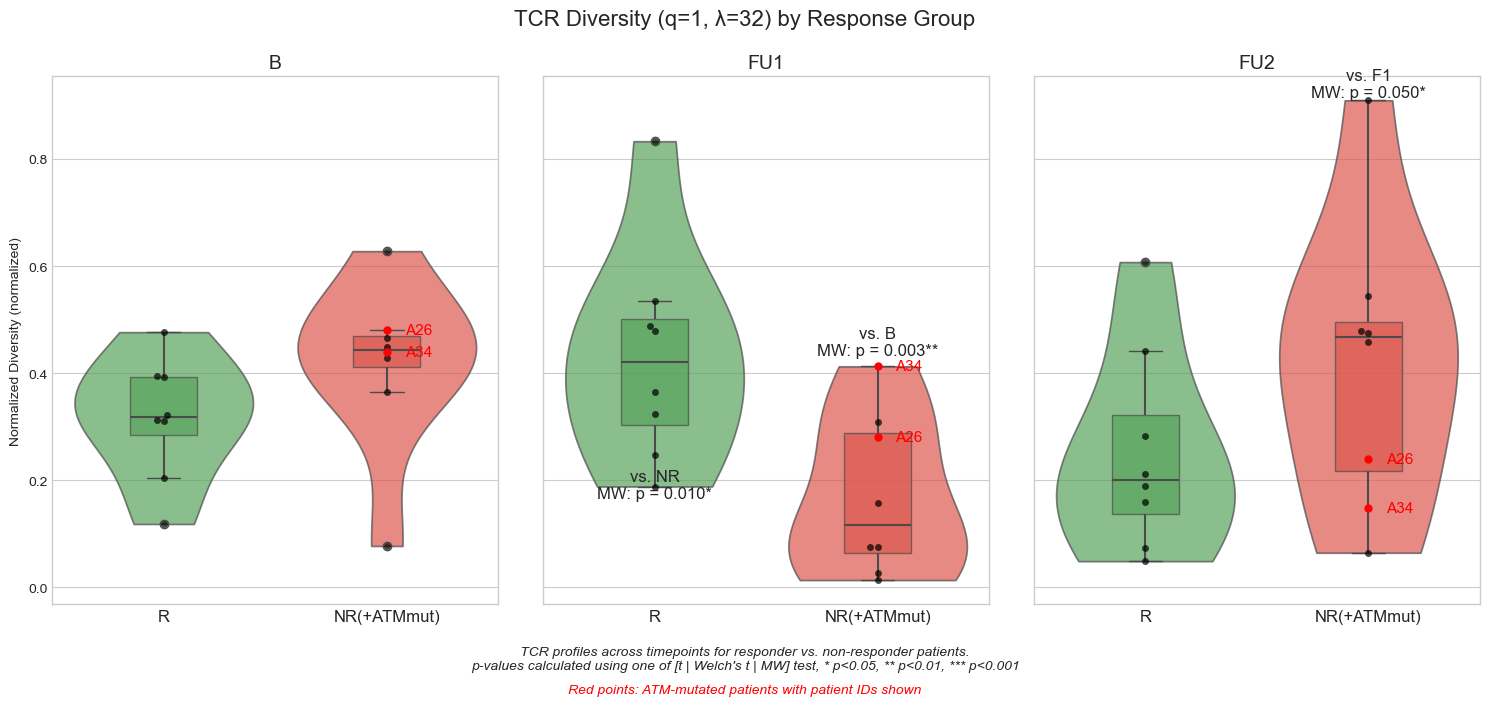

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'Arial'

# Melt dataframe
melted_df = pd.melt(
    diversity_df_intact_normalized,
    id_vars=['patient', 'response'],
    value_vars=['B', 'F1', 'F2'],
    var_name='timepoint',
    value_name='diversity'
)
melted_df['response_group'] = melted_df['response'].apply(lambda x: 'R' if x == 'R' else 'ATMmut./NR')
melted_df['is_atm_mut'] = melted_df['response'] == 'ATMmut.'  # Flag for ATMmut patients
melted_df['response_group'].value_counts()

# Plot setup
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
timepoints = ['B', 'F1', 'F2']
titles = ['B', 'FU1', 'FU2']
palette = {'R': '#4CAF50', 'ATMmut./NR': '#F44336'}
ORDER = ['R', 'ATMmut./NR']  # Ensure R is first for consistent ordering

# Plot each timepoint
for i, timepoint in enumerate(timepoints):
    tp_data = melted_df[melted_df['timepoint'] == timepoint]
    
    # violin + box
    sns.violinplot(data=tp_data, x='response_group', y='diversity',
                   hue='response_group', palette=palette, legend=False,
                   alpha=0.7, cut=0, inner=None, ax=axes[i], order=ORDER)
    sns.boxplot(data=tp_data, x='response_group', y='diversity',
                hue='response_group', palette=palette, legend=False,
                width=0.3, boxprops={'alpha': 0.7},
                whiskerprops={'linewidth': 1.5}, medianprops={'linewidth': 1.5},
                ax=axes[i], order=ORDER)
    
    # First plot non-ATMmut points in black
    non_atm = tp_data[~tp_data['is_atm_mut']]
    sns.swarmplot(data=non_atm, x='response_group', y='diversity',
                  color='black', size=5, alpha=0.7, ax=axes[i], order=ORDER)
    
    # Then plot ATMmut points in red and add labels
    atm_mut = tp_data[tp_data['is_atm_mut']]
    if not atm_mut.empty:
        sns.swarmplot(data=atm_mut, x='response_group', y='diversity',
                      color='red', size=6, alpha=1.0, ax=axes[i], order=ORDER)
        
        # Add patient ID labels next to these points
        for _, row in atm_mut.iterrows():
            x_pos = ORDER.index(row['response_group'])
            axes[i].text(x_pos + 0.08, row['diversity'], 
                         f"A{row['patient']}", 
                         color='red', fontsize=11, ha='left', va='center')

    # labels
    axes[i].set_title(titles[i], fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Normalized Diversity (normalized)' if i == 0 else '')

    # Fix x-tick labels based on ORDER
    label_dict = {'R': 'R', 'ATMmut./NR': 'NR(+ATMmut)'}
    axes[i].set_xticks(range(len(ORDER)))
    axes[i].set_xticklabels([label_dict[group] for group in ORDER], fontsize=12)


    # R vs NR p-value
    stat_key = 'test_used_' + timepoint
    if stat_key in stat_results_in_tps:
        test_type = stat_results_in_tps[stat_key]
        p_value = stat_results_in_tps['p_' + timepoint]

        if p_value < 0.05:
            method = {'t-test': 't', "Welch's t-test": 'Wt'}.get(test_type, 'MW')
            p_text = f"vs. NR\n{method}: p = {p_value:.3f}*"
            if p_value < 0.01: p_text += "*"
            if p_value < 0.001: p_text += "*"

            group_data = tp_data[tp_data['response_group'] == 'R']
            y_max = group_data['diversity'].max()
            axes[i].text(ORDER.index('R'), y_max * HEIGHT_P_VAL_VS_NR, p_text, ha='center', fontsize=12)

    # intra-group comparisons at F1 and F2
    if timepoint in ['F1', 'F2']:
        for grp, comp_df, height_dict in [
            ('R', comparison_results_in_r, {
                'B vs F1': HEIGHT_P_VAL_B_F1_R,
                'B vs F2': HEIGHT_P_VAL_B_F2_R,
                'F1 vs F2': HEIGHT_P_VAL_F1_F2_R}),
            ('ATMmut./NR', comparison_results_in_nr, {
                'B vs F1': HEIGHT_P_VAL_B_F1_NR,
                'B vs F2': HEIGHT_P_VAL_B_F2_NR,
                'F1 vs F2': HEIGHT_P_VAL_F1_F2_NR})
        ]:
            for comp in ['B vs F1', 'B vs F2', 'F1 vs F2']:
                # Show only on right-hand side timepoint
                plot_timepoint = comp.split(' vs ')[1]
                if timepoint != plot_timepoint:
                    continue
                
                row = comp_df[comp_df['Comparison'] == comp]
                if row.empty or row['p-value'].values[0] >= 0.05:
                    continue
                
                test = row['Test Used'].values[0]
                pval = row['p-value'].values[0]
                test_text = "t" if test == "t-test" else "Wt" if test == "Welch's t-test" else "MW"
                label_text = f"vs. {'B' if 'B' in comp else 'F1'}\n{test_text}: p = {pval:.3f}*"
                if pval < 0.01: label_text += "*"
                if pval < 0.001: label_text += "*"
    
                group_data = melted_df[
                    (melted_df['response_group'] == grp) &
                    (melted_df['timepoint'] == timepoint)
                ]
                y_max = group_data['diversity'].max()
                axes[i].text(
                    ORDER.index(grp),
                    y_max * height_dict[comp],
                    label_text,
                    ha='center',
                    fontsize=12
                )


# Final touches
plt.tight_layout()
plt.subplots_adjust(wspace=0.1)

if q_fixed == 0 and lambda_fixed == 0:
    plt.suptitle('TCR Diversity (Shannon Diversity) by Response Group', fontsize=16, y=1.05)
elif q_fixed == 1 and lambda_fixed == 0:
    plt.suptitle('TCR Shannon Clonality by Response Group', fontsize=16, y=1.05)
else:
    plt.suptitle(f'TCR Diversity (q={q_fixed}, λ={lambda_fixed}) by Response Group', fontsize=16, y=1.05)

plt.figtext(0.5, -0.05,
           f'TCR profiles across timepoints for responder vs. non-responder patients.\n'
           f"p-values calculated using one of [t | Welch's t | MW] test, * p<0.05, ** p<0.01, *** p<0.001",
           ha='center', fontsize=10, style='italic')

# Add a legend for ATM mutant patients
plt.figtext(0.5, -0.09, 
            "Red points: ATM-mutated patients with patient IDs shown",
            ha='center', fontsize=10, color='red', style='italic')

plt.show()

#### B vs F1 vs F2

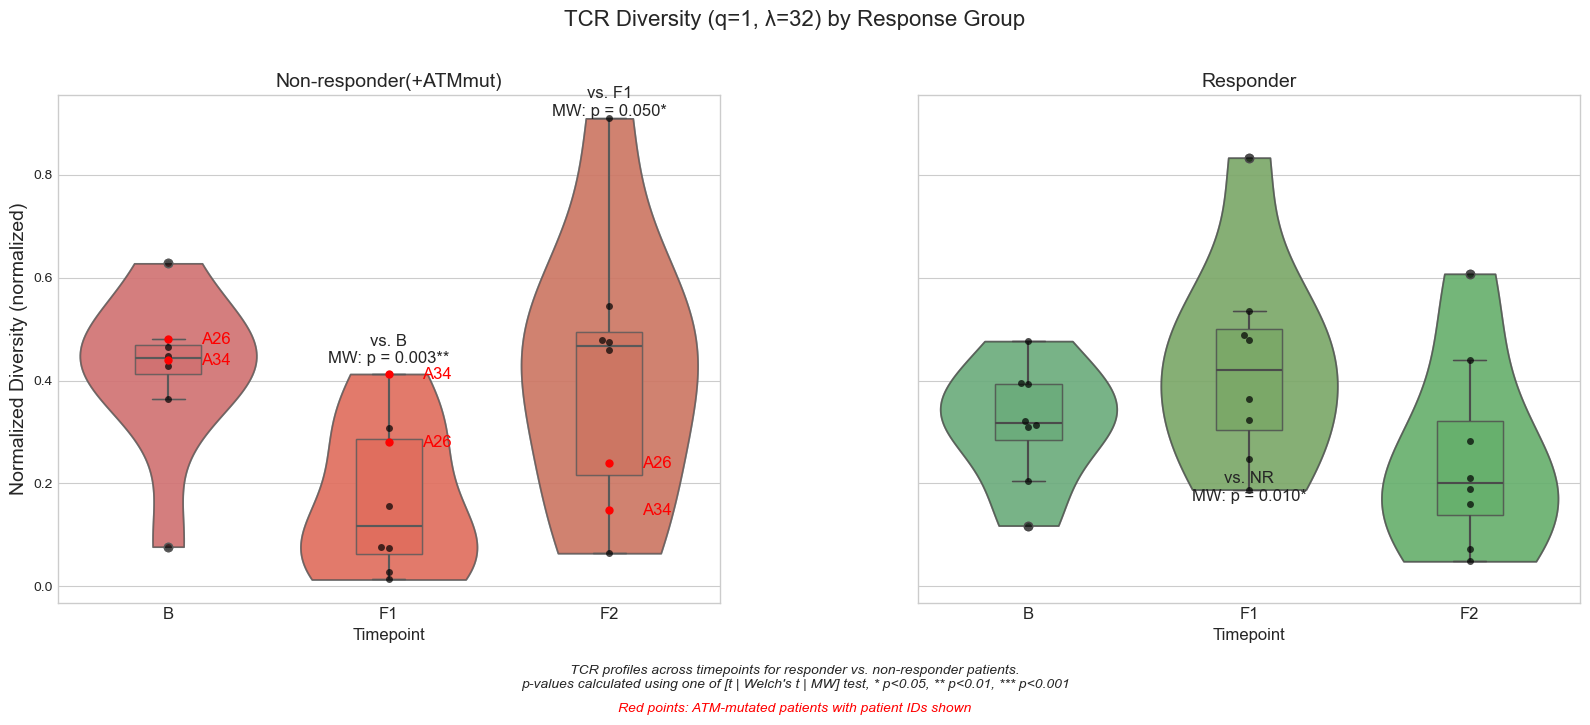

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'Arial'

# Melt dataframe
melted_df = pd.melt(diversity_df_intact_normalized, 
                    id_vars=['patient', 'response'],
                    value_vars=['B', 'F1', 'F2'],
                    var_name='timepoint',
                    value_name='diversity')
melted_df['response_group'] = melted_df['response'].apply(lambda x: 'R' if x == 'R' else 'ATMmut./NR')
# Add a flag for ATM mutant patients
melted_df['is_atm_mut'] = melted_df['response'] == 'ATMmut.'

# Palette
palette = {'R': '#4CAF50', 'ATMmut./NR': '#F44336'}

# Group plotting order
ORDER = ['ATMmut./NR', 'R']
timepoints = ['B', 'F1', 'F2']
titles = ['Non-responder(+ATMmut)', 'Responder']

# Subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

for idx, group in enumerate(ORDER):
    group_data = melted_df[melted_df['response_group'] == group]
    ax = axes[idx]

    sns.violinplot(data=group_data, x='timepoint', y='diversity',
                   hue='timepoint', palette='pastel', legend=False,
                   alpha=0.7, cut=0, inner=None, ax=ax)

    sns.boxplot(data=group_data, x='timepoint', y='diversity',
                hue='timepoint', palette='pastel', legend=False,
                width=0.3, boxprops={'alpha': 0.7},
                whiskerprops={'linewidth': 1.5}, medianprops={'linewidth': 1.5},
                ax=ax)
    
    # Plot non-ATM patients in black
    non_atm_data = group_data[~group_data['is_atm_mut']]
    sns.swarmplot(data=non_atm_data, x='timepoint', y='diversity',
                  color='black', size=5, alpha=0.7, ax=ax)
    
    # Plot ATM mutant patients in red
    atm_data = group_data[group_data['is_atm_mut']]
    if not atm_data.empty:
        sns.swarmplot(data=atm_data, x='timepoint', y='diversity',
                      color='red', size=6, alpha=1.0, ax=ax)
        
        # Add patient ID labels next to ATM mutant points
        for _, row in atm_data.iterrows():
            tp_idx = timepoints.index(row['timepoint'])
            ax.text(tp_idx + 0.15, row['diversity'], 
                    f"A{row['patient']}", 
                    color='red', fontsize=12, ha='left', va='center')

    ax.set_title(titles[idx], fontsize=14)
    ax.set_xlabel('Timepoint', fontsize=12)
    if idx == 0:
        ax.set_ylabel('Normalized Diversity (normalized)', fontsize=14)
    else:
        ax.set_ylabel('')

    # Fix x-ticks BEFORE setting tick labels
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(['B', 'F1', 'F2'], fontsize=12)

    # Force same color for all timepoints (override pastel)
    fixed_palette = {tp: palette[group] for tp in timepoints}

    sns.violinplot(data=group_data, x='timepoint', y='diversity',
                   hue='timepoint', palette=fixed_palette, legend=False,
                   alpha=0.7, cut=0, inner=None, ax=ax)

    sns.boxplot(data=group_data, x='timepoint', y='diversity',
                hue='timepoint', palette=fixed_palette, legend=False,
                width=0.3, boxprops={'alpha': 0.7},
                whiskerprops={'linewidth': 1.5}, medianprops={'linewidth': 1.5},
                ax=ax)

# === p-value text ===
for i, tp in enumerate(timepoints):
    if 'test_used_' + tp in stat_results_in_tps:
        test_type = stat_results_in_tps['test_used_' + tp]
        p_value = stat_results_in_tps['p_' + tp]
        if p_value < 0.05:
            if test_type == "t-test":
                p_text = f"vs. NR\nt: p = {p_value:.3f}*"
            elif test_type == "Welch's t-test":
                p_text = f"vs. NR\nWt: p = {p_value:.3f}*"
            else:
                p_text = f"vs. NR\nMW: p = {p_value:.3f}*"
            if p_value < 0.01:
                p_text += "*"
                if p_value < 0.001:
                    p_text += "*"
            y_max = group_data[group_data['timepoint'] == tp]['diversity'].max()
            ax.text(i, y_max * HEIGHT_P_VAL_VS_NR, p_text, ha='center', fontsize=12)

# group-specific timepoint comparisons

# NR(+ATMmut) group subplot: axes[0]
comparisons = [
    ('B vs F1', 'F1', 'vs. B', HEIGHT_P_VAL_B_F1_NR),
    ('B vs F2', 'F2', 'vs. B', HEIGHT_P_VAL_B_F2_NR),
    ('F1 vs F2', 'F2', 'vs. F1', HEIGHT_P_VAL_F1_F2_NR),
]
for comp, xpos, label, height in comparisons:
    row = comparison_results_in_nr[comparison_results_in_nr['Comparison'] == comp]
    if not row.empty and row['p-value'].values[0] < 0.05:
        test = row['Test Used'].values[0]
        pval = row['p-value'].values[0]
        test_text = "t" if test == "t-test" else "Wt" if test == "Welch's t-test" else "MW"
        text = f"{label}\n{test_text}: p = {pval:.3f}*"
        if pval < 0.01: text += "*"
        if pval < 0.001: text += "*"

        group_data = melted_df[(melted_df['response_group'] == 'ATMmut./NR')]
        tp_subset = group_data[group_data['timepoint'] == xpos]
        if not tp_subset.empty:
            y_max = tp_subset['diversity'].max()
            axes[0].text(xpos, y_max * height, text, ha='center', fontsize=12)

# R group subplot: axes[1]
# Use the same comparisons but for the R group
comparisons = [
    ('B vs F1', 'F1', 'vs. B', HEIGHT_P_VAL_B_F1_R),
    ('B vs F2', 'F2', 'vs. B', HEIGHT_P_VAL_B_F2_R),
    ('F1 vs F2', 'F2', 'vs. F1', HEIGHT_P_VAL_F1_F2_R)
]
for comp, xpos, label, height in comparisons:
    row = comparison_results_in_r[comparison_results_in_r['Comparison'] == comp]
    if not row.empty and row['p-value'].values[0] < 0.05:
        test = row['Test Used'].values[0]
        pval = row['p-value'].values[0]
        test_text = "t" if test == "t-test" else "Wt" if test == "Welch's t-test" else "MW"
        text = f"{label}\n{test_text}: p = {pval:.3f}*"
        if pval < 0.01: text += "*"
        if pval < 0.001: text += "*"

        group_data = melted_df[(melted_df['response_group'] == 'R')]
        tp_subset = group_data[group_data['timepoint'] == xpos]
        if not tp_subset.empty:
            y_max = tp_subset['diversity'].max()
            axes[1].text(xpos, y_max * height, text, ha='center', fontsize=12)
            
# Title and caption
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
if q_fixed == 0 and lambda_fixed == 0:
    plt.suptitle('TCR Diversity (Shannon Diversity) by Response Group', fontsize=16, y=1.08)
elif q_fixed == 1 and lambda_fixed == 0:
    plt.suptitle('TCR Shannon Clonality by Response Group', fontsize=16, y=1.08)
else:
    plt.suptitle(f'TCR Diversity (q={q_fixed}, λ={lambda_fixed}) by Response Group',
                 fontsize=16, y=1.08)

plt.figtext(0.5, -0.05,
            f'TCR profiles across timepoints for responder vs. non-responder patients.\n'
            f"p-values calculated using one of [t | Welch's t | MW] test, * p<0.05, ** p<0.01, *** p<0.001",
            ha='center', fontsize=10, style='italic')

# Add a legend for ATM mutant patients
plt.figtext(0.5, -0.09, 
            "Red points: ATM-mutated patients with patient IDs shown",
            ha='center', fontsize=10, color='red', style='italic')

plt.show()